# Demand of Taxi in NY city 

In [1]:
import os

os.chdir('E:\Datasets\\NYC Taxi')

In [2]:
import dask.dataframe as dd

# Ref : https://github.com/dask/dask-tutorial
# Ref : https://dask.org/dask-tutorial/introduction.html#/0/5

<font size=3>
A Dask DataFrame is a large parallel DataFrame composed of many smaller Pandas DataFrames, split along the index. These Pandas DataFrames may live on disk for larger-than-memory computing on a single machine, or on many different machines in a cluster. One Dask DataFrame operation triggers many operations on the constituent Pandas DataFrames.

Dask DataFrame is used in situations where Pandas is commonly needed, usually when Pandas fails due to data size or computation speed:

    1. Manipulating large datasets, even when those datasets don’t fit in memory
    2. Accelerating long computations by using many cores
    3. Distributed computing on large datasets with standard Pandas operations like groupby, join, and time series computations
</font>
<i>  Ref : http://docs.dask.org/en/latest/dataframe.html <br>
Ref : http://docs.dask.org/en/latest/use-cases.html

In [3]:
df = dd.read_csv('yellow_tripdata_2015-01.csv')

df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


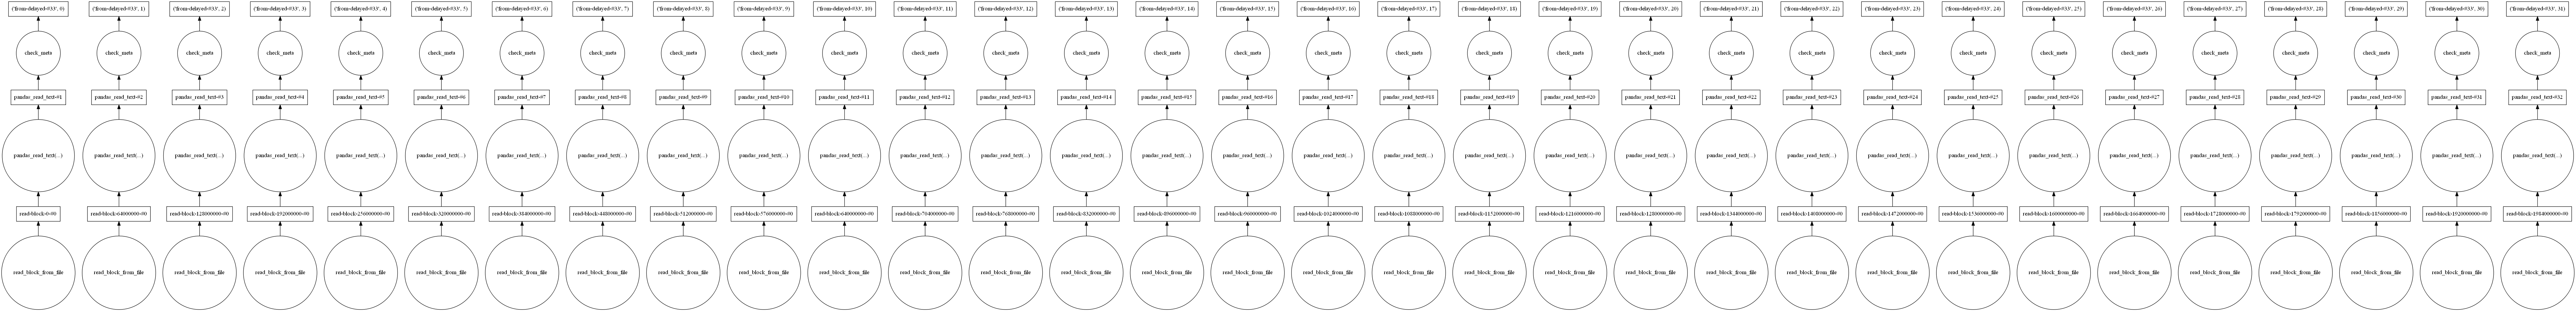

In [5]:
# Unlike Pandas, operations on dask.dataframes don't trigger immediate computation, 
# instead they add key-value pairs to an underlying Dask graph. 

df.visualize()

In the diagram, circles are operations and rectangles are results.

To see the visulaization use graphviz

( Double Tap to expand image )

In [6]:
li = list ( df.columns )
print( li )

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']


## Feature Description

<br>
<b>tpep_pickup_datetime</b> :	The date and time when the meter was engaged.<br>

<b>tpep_dropoff_datetime</b> :	The date and time when the meter was disengaged.<br>

 <b>Passenger_count</b> :	The number of passengers in the vehicle. This is a driver-entered value.<br>
 
 <b>Trip_distance</b> :	The elapsed trip distance in miles reported by the taximeter.<br>
 
 <b>Pickup_longitude</b> :	Longitude where the meter was engaged.<br>
 
 <b>Pickup_latitude</b> :	Latitude where the meter was engaged.<br>

<b>Store_and_fwd_flag</b> :	This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,
aka “store and forward,” because the vehicle did not have a connection to the server. 
        1. Y= store and forward trip 
        2. N= not a store and forward trip

<b>Dropofflongitude</b> :Longitude where the meter was disengaged.

 <b>Dropoff latitude</b> :	Latitude where the meter was disengaged.

<b>Fare_amount</b> :	The time-and-distance fare calculated by the meter.

<b>Extra</b> :	Miscellaneous extras and surcharges. Currently, this only includes. the  0.50and0.50and 1 rush hour and overnight charges.

<b>MTA_tax</b> :	0.50 MTA tax that is automatically triggered based on the metered rate in use.

<b>Improvement_surcharge</b> :	0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.

<b>Tip_amount</b> :	Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.

<b>Tolls_amount</b> :	Total amount of all tolls paid in trip.

<b>Total_amount</b> :	The total amount charged to passengers. Does not include cash tips.

<b>VendorID</b> : A code indicating the TPEP provider that provided the record.
                1. : Creative Mobile Technologies
                2. : VeriFone Inc.

<b>RateCodeID</b> :  The final rate code in effect at the end of the trip.
        1. Standard rate
        2. JFK
        3. Newark
        4. Nassau or Westchester
        5. Negotiated fare
        6. Group ride
        
<b>Payment_type</b> :   A numeric code signifying how the passenger paid for the trip.

        1. Credit card
        2. Cash
        3. No charge
        4. Dispute
        5. Unknown
        6. Voided trip
        
<br> <br>
<b> Our Problem </b>:

To find number of pickups, given location cordinates(latitude and longitude) and time, in the query reigion and surrounding regions.

## Univariate Analysis and Data Cleaning

We need to consider only those points residing inside New York

As we are only concerned with pickups which originate within New York.

## pickup_longitude and pickup_latitude

In [7]:
df[['pickup_longitude','pickup_latitude']].head()

,pickup_longitude,pickup_latitude
0,-73.993896,40.750111
1,-74.001648,40.724243
2,-73.963341,40.802788
3,-74.009087,40.713818
4,-73.971176,40.762428


New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinate not within these cordinates is not considered ( pickups which originate within New York )

In [8]:
outloc = df[ (( df.pickup_longitude <= -74.15) | (df.pickup_latitude <= 40.5774)| \
                   (df.pickup_longitude >= -73.7004) | (df.pickup_latitude >= 40.9176))]

In [9]:
import folium

m = folium.Map(location=[40.734695, -73.990372], tiles='OpenStreetMap')


# folium : Make beautiful, interactive maps with Python and Leaflet.js

# location (tuple or list, default None) – Latitude and Longitude of Map (Northing, Easting).
# tiles (str, default 'OpenStreetMap') – Map tileset to use. Can choose from a list of built-in tiles, 
# pass a custom URL or pass None to create a map without tiles.

# Ref : https://python-visualization.github.io/folium/modules.html
# Ref : https://python-visualization.github.io/folium/quickstart.html#Getting-Started
# Ref : https://pypi.org/project/folium/0.1.5/

In [10]:
# Taking only 1000 outlier points cause more would take time to plot

sample = outloc.head(1000)

for i,j in sample.iterrows():
    if int( j['pickup_latitude'] ) != 0:
        folium.Marker( list(( j['pickup_latitude'], j['pickup_longitude'] )) ).add_to( m )

m

## dropoff_longitude and dropoff_latitude

In [50]:
#  we are only concerned with dropoff's which are within New York.

outloc = df[ (( df.dropoff_longitude <= -74.15) | (df.dropoff_latitude <= 40.5774)| \
                   (df.dropoff_longitude >= -73.7004) | (df.dropoff_latitude >= 40.9176))]

In [51]:
m = folium.Map(location=[40.734695, -73.990372], tiles='OpenStreetMap')


# folium : Make beautiful, interactive maps with Python and Leaflet.js

# location (tuple or list, default None) – Latitude and Longitude of Map (Northing, Easting).
# tiles (str, default 'OpenStreetMap') – Map tileset to use. Can choose from a list of built-in tiles, 
# pass a custom URL or pass None to create a map without tiles.

# Ref : https://python-visualization.github.io/folium/modules.html
# Ref : https://python-visualization.github.io/folium/quickstart.html#Getting-Started
# Ref : https://pypi.org/project/folium/0.1.5/

In [52]:
# Taking only 1000 outlier points cause more would take time to plot

sample = outloc.head(1000)

for i,j in sample.iterrows():
    if int( j['pickup_latitude'] ) != 0:
        folium.Marker( list(( j['dropoff_latitude'], j['dropoff_longitude'] )) ).add_to( m )

m

As compared to pickup more dropoff's happen outside NY

## tpep_pickup_datetime and tpep_dropoff_datetime

Trip Duration ( tpep_pickup_datetime and tpep_dropoff_datetime )

According to NYC Taxi &amp; Limousine Commision Regulations the maximum allowed trip duration in a 24 hour interval is 12 hours.

In [53]:
df[['tpep_pickup_datetime','tpep_dropoff_datetime']].head()

,tpep_pickup_datetime,tpep_dropoff_datetime
0,2015-01-15 19:05:39,2015-01-15 19:23:42
1,2015-01-10 20:33:38,2015-01-10 20:53:28
2,2015-01-10 20:33:38,2015-01-10 20:43:41
3,2015-01-10 20:33:39,2015-01-10 20:35:31
4,2015-01-10 20:33:39,2015-01-10 20:52:58


In [54]:
# Understanding localtime() and mktime()

import time

print('-'*42,'localtime() on 1545925769 ','-'*45)
result = time.localtime(1545925769)
print( result )

# The localtime() function takes the number of seconds passed since epoch as an argument and returns struct_time in local time.

print()

t = (2018, 12, 28, 8, 44, 4, 4, 362, 0)
print('-'*35,'mktime() on ',t ,'-'*40)

local_time = time.mktime(t)
print("Local time:", local_time)

# The mktime() function takes struct_time (or a tuple containing 9 elements corresponding to struct_time) as an argument
# and returns the seconds passed since epoch in local time. Basically, it's the inverse function of localtime().

# Ref : https://www.programiz.com/python-programming/time#mktime

------------------------------------------ localtime() on 1545925769  ---------------------------------------------
time.struct_time(tm_year=2018, tm_mon=12, tm_mday=27, tm_hour=21, tm_min=19, tm_sec=29, tm_wday=3, tm_yday=361, tm_isdst=0)

----------------------------------- mktime() on  (2018, 12, 28, 8, 44, 4, 4, 362, 0) ----------------------------------------
Local time: 1545966844.0


In [55]:
# Understanding strptime

time_string = "21 June, 2018"

result = time.strptime(time_string, "%d %B, %Y")
print(result)

# The strptime() function parses a string representing time and returns struct_time.

time.struct_time(tm_year=2018, tm_mon=6, tm_mday=21, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=172, tm_isdst=-1)


In [56]:
# Understanding timetuple()

import datetime

todaysDate = datetime.date.today()
timeTuple = todaysDate.timetuple()

print(timeTuple)
print(timeTuple.tm_year)

# The timetuple() method of datetime.date instances returns an object of type time.struct_time. 

time.struct_time(tm_year=2019, tm_mon=5, tm_mday=17, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=4, tm_yday=137, tm_isdst=-1)
2019


In [57]:
df[['tpep_pickup_datetime','tpep_dropoff_datetime']].compute().head()

,tpep_pickup_datetime,tpep_dropoff_datetime
0,2015-01-15 19:05:39,2015-01-15 19:23:42
1,2015-01-10 20:33:38,2015-01-10 20:53:28
2,2015-01-10 20:33:38,2015-01-10 20:43:41
3,2015-01-10 20:33:39,2015-01-10 20:35:31
4,2015-01-10 20:33:39,2015-01-10 20:52:58


In [58]:
import datetime 
import time
import numpy as np

def convert( t ):
    # We have a time in the format "YYYY-MM-DD HH:MM:SS", which is a string
    # datetime.datetime.strptime( t, "%Y-%m-%d %H:%M:%S" ) : this will convert the String time into datetime format
    # .timetuple() : this will convert the datetime formatted time into structured time
    
    return time.mktime( datetime.datetime.strptime( t, "%Y-%m-%d %H:%M:%S" ).timetuple() )
    


def newTime( df ):
    dur = df[['tpep_pickup_datetime','tpep_dropoff_datetime']].compute()  # Duration

    durPickup = [ convert(x) for x in dur['tpep_pickup_datetime'].values ]
    durDrop = [ convert(x) for x in dur['tpep_dropoff_datetime'].values ]
    
    # Calculating duration of the trip
    durations = ( np.array(durDrop) - np.array(durPickup) ) / float(60)

    # Creating new df and appending durations of trip and speed in miles/hr
    newdf = df[['passenger_count','trip_distance','pickup_longitude','pickup_latitude',\
                       'dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    newdf['trip_time'] = durations
    newdf['pickup_time'] = durPickup
    newdf['speed'] = 60 * ( newdf['trip_distance'] / newdf['trip_time'] )
    # speed = distance / time
    
    return newdf

# Ref : https://www.unixtimestamp.com/

In [59]:
df1 = newTime( df )

df1.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_time,pickup_time,speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421329e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420902e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420902e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420902e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420902e+09,9.318378


In [60]:
import warnings
warnings.filterwarnings("ignore")

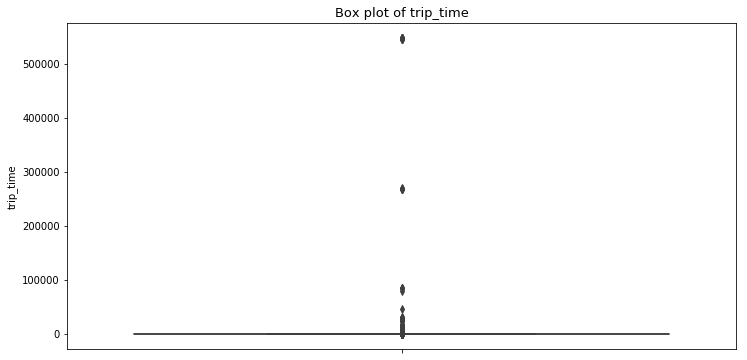

In [61]:
# This box plot shows us the presence of outliers 
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))

sns.boxplot( y="trip_time", data = df1 )
plt.title('Box plot of trip_time',size=13)

plt.show()

In [62]:
# Calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    
    var = df1["trip_time"].values
    var = np.sort( var, axis = None )
    
    print( i,"th percentile value is : ", var[ int( len(var) * ( float(i) / 100 ) )])
    
print ("100 percentile value is ", var[-1])

0 th percentile value is :  -1211.0166666666667
10 th percentile value is :  3.8333333333333335
20 th percentile value is :  5.383333333333334
30 th percentile value is :  6.816666666666666
40 th percentile value is :  8.3
50 th percentile value is :  9.95
60 th percentile value is :  11.866666666666667
70 th percentile value is :  14.283333333333333
80 th percentile value is :  17.633333333333333
90 th percentile value is :  23.45
100 percentile value is  548555.6333333333


In [63]:
# There is a very high change from 90 th to 100 th percentile
for i in range(90, 100):
    
    var = df1["trip_time"].values
    var = np.sort( var, axis = None )
    
    print( i,"th percentile value is : ", var[ int( len(var) * ( float(i) / 100 ) )])
    
print ("100 percentile value is ", var[-1])

90 th percentile value is :  23.45
91 th percentile value is :  24.35
92 th percentile value is :  25.383333333333333
93 th percentile value is :  26.55
94 th percentile value is :  27.933333333333334
95 th percentile value is :  29.583333333333332
96 th percentile value is :  31.683333333333334
97 th percentile value is :  34.46666666666667
98 th percentile value is :  38.71666666666667
99 th percentile value is :  46.75
100 percentile value is  548555.6333333333


In [64]:
# Cleaning data based on our Analysis and Taxi & Limousine Commision Regulations

#data = df1[ ( df1.trip_time > 1 ) & ( df1.trip_time < 48 ) ]
data = df1[ ( df1.trip_time > 1 ) & ( df1.trip_time < 720 ) ]     

# Since 12 hrs * 60 = 720 mins
# According to NYC Taxi & Limousine Commision Regulations the maximum allowed trip duration in a 24 hour interval is 12 hours.

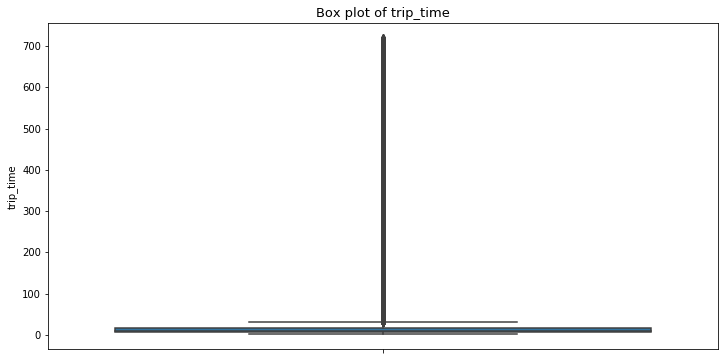

In [65]:
# Box plot after removing outliers

plt.figure(figsize=(12,6))

sns.boxplot( y="trip_time", data = data )
plt.title('Box plot of trip_time',size=13)

plt.show()

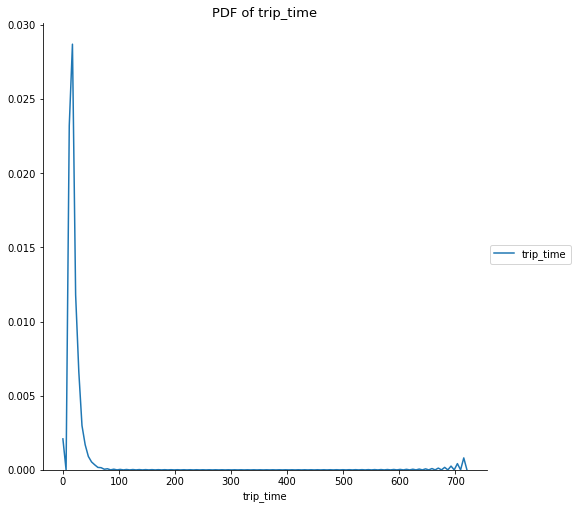

In [66]:
# PDF of trip_time
sns.FacetGrid( data,size=7 ).map( sns.kdeplot,"trip_time").add_legend()
plt.title('PDF of trip_time',size=13)

plt.show()

In [67]:
# Converting trip_time values to log-values to check for log-normal distribution
import math

data['log_time'] = [ math.log(i) for i in data['trip_time'].values ]

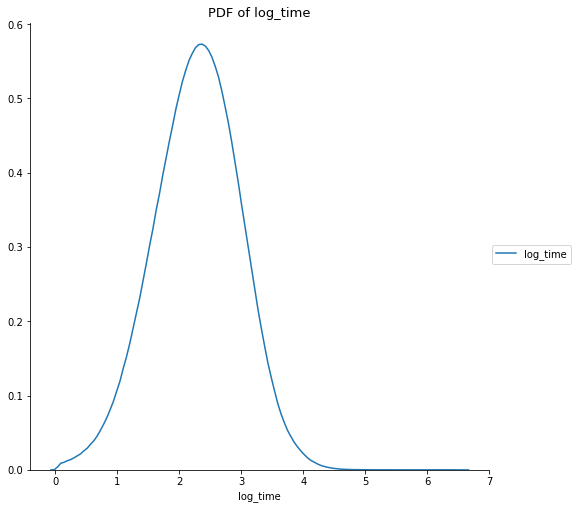

In [68]:
# PDF of log_time
sns.FacetGrid( data,size=7 ).map( sns.kdeplot,"log_time").add_legend()
plt.title('PDF of log_time',size=13)
plt.show()

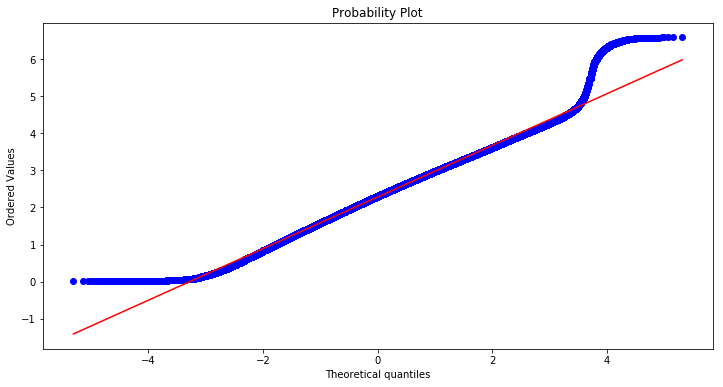

In [69]:
# Q-Q plot for checking if trip-time is log-normal
import scipy

plt.figure(figsize=(12,6))

scipy.stats.probplot( data['log_time'].values, plot=plt )
plt.show()

## trip_distance

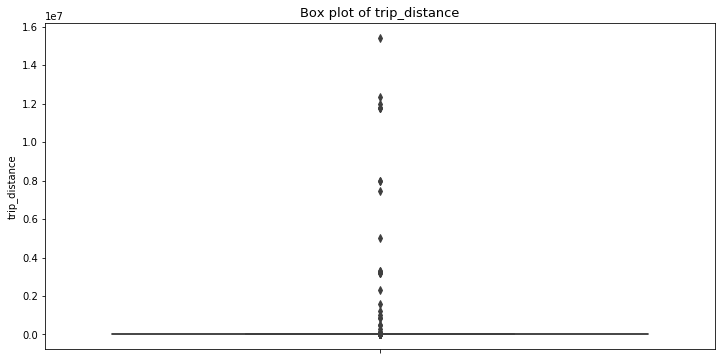

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))

sns.boxplot( y="trip_distance", data = data )
plt.title('Box plot of trip_distance',size=13)

plt.show()

In [71]:
# Calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    
    var = data["trip_distance"].values
    var = np.sort( var, axis = None )
    
    print( i,"th percentile value is : ", var[ int( len(var) * ( float(i) / 100 ) )])
    
print ("100 percentile value is ", var[-1])

0 th percentile value is :  0.0
10 th percentile value is :  0.67
20 th percentile value is :  0.9
30 th percentile value is :  1.1
40 th percentile value is :  1.39
50 th percentile value is :  1.7
60 th percentile value is :  2.08
70 th percentile value is :  2.61
80 th percentile value is :  3.6
90 th percentile value is :  6.0
100 percentile value is  15420004.5


In [72]:
# There is a very high change from 90 th to 100 th percentile
for i in range(90, 100):
    
    var = df1["speed"].values
    var = np.sort( var, axis = None )
    
    print( i,"th percentile value is : ", var[ int( len(var) * ( float(i) / 100 ) )])
    
print ("100 percentile value is ", var[-1])

90 th percentile value is :  20.30075187969925
91 th percentile value is :  21.048000000000002
92 th percentile value is :  21.90789473684211
93 th percentile value is :  22.899193548387093
94 th percentile value is :  24.05466970387244
95 th percentile value is :  25.43848580441641
96 th percentile value is :  27.120291616038884
97 th percentile value is :  29.261083743842363
98 th percentile value is :  32.19941348973607
99 th percentile value is :  36.80629539951574
100 percentile value is  nan


In [73]:
for i in np.arange(0.0, 1.0, 0.1):
    
    var = data["trip_distance"].values
    var = np.sort(var,axis = None)
    
    print(99+i,"th percentile value is : ", var[ int( len(var) * ( float(99+i) / 100 )) ])
print("100 th percentile value is ",var[-1])

99.0 th percentile value is :  18.23
99.1 th percentile value is :  18.44
99.2 th percentile value is :  18.69
99.3 th percentile value is :  18.93
99.4 th percentile value is :  19.24
99.5 th percentile value is :  19.6
99.6 th percentile value is :  20.1
99.7 th percentile value is :  20.68
99.8 th percentile value is :  21.4
99.9 th percentile value is :  23.1
100 th percentile value is  15420004.5


In [74]:
data = data [( data.trip_distance > 0 ) & ( data.trip_distance < 23 )]

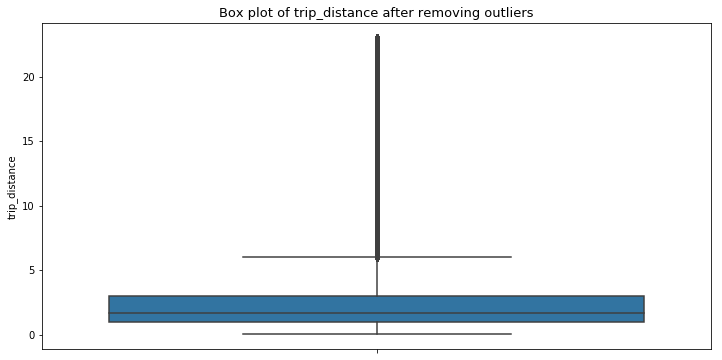

In [75]:
plt.figure(figsize=(12,6))

sns.boxplot( y="trip_distance", data = data )
plt.title('Box plot of trip_distance after removing outliers',size=13)

plt.show()

## Speed

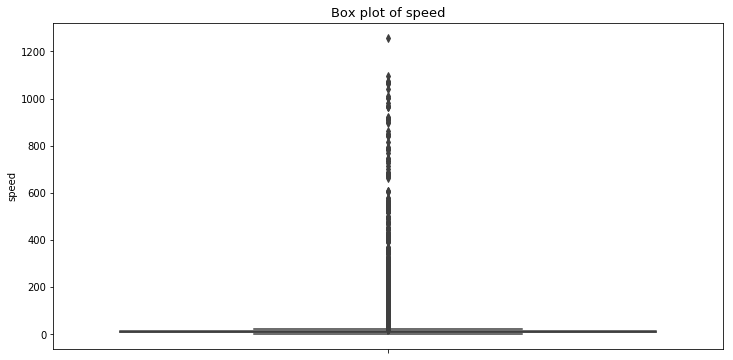

In [76]:
# Checking for outliers after removal of trip_time outliers

data['speed'] = 60 * ( data['trip_distance'] / data['trip_time'] )

plt.figure(figsize=(12,6))

sns.boxplot( y="speed", data = data )
plt.title('Box plot of speed',size=13)

plt.show()

In [77]:
# Calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    
    var = data["speed"].values
    var = np.sort( var, axis = None )
    
    print( i,"th percentile value is : ", var[ int( len(var) * ( float(i) / 100 ) )])
    
print ("100 percentile value is ", var[-1])

0 th percentile value is :  0.0037274798094843655
10 th percentile value is :  6.428571428571428
20 th percentile value is :  7.820466786355475
30 th percentile value is :  8.93525179856115
40 th percentile value is :  9.984375
50 th percentile value is :  11.069767441860463
60 th percentile value is :  12.285097192224622
70 th percentile value is :  13.790322580645158
80 th percentile value is :  15.949367088607593
90 th percentile value is :  20.13986013986014
100 percentile value is  1257.142857142857


In [78]:
# There is a very high change from 90 th to 100 th percentile
for i in range(90, 100):
    
    var = df1["speed"].values
    var = np.sort( var, axis = None )
    
    print( i,"th percentile value is : ", var[ int( len(var) * ( float(i) / 100 ) )])
    
print ("100 percentile value is ", var[-1])

90 th percentile value is :  20.30075187969925
91 th percentile value is :  21.048000000000002
92 th percentile value is :  21.90789473684211
93 th percentile value is :  22.899193548387093
94 th percentile value is :  24.05466970387244
95 th percentile value is :  25.43848580441641
96 th percentile value is :  27.120291616038884
97 th percentile value is :  29.261083743842363
98 th percentile value is :  32.19941348973607
99 th percentile value is :  36.80629539951574
100 percentile value is  nan


In [79]:
for i in np.arange(0.0, 1.0, 0.1):
    
    var = data["speed"].values
    var = np.sort(var,axis = None)
    
    print(99+i,"th percentile value is : ", var[ int( len(var) * ( float(99+i) / 100 )) ])
print("100 th percentile value is ",var[-1])

99.0 th percentile value is :  35.47957259585167
99.1 th percentile value is :  36.03090128755365
99.2 th percentile value is :  36.62068965517241
99.3 th percentile value is :  37.274157303370785
99.4 th percentile value is :  38.00804020100503
99.5 th percentile value is :  38.8314606741573
99.6 th percentile value is :  39.78609625668449
99.7 th percentile value is :  40.945945945945944
99.8 th percentile value is :  42.42264647794601
99.9 th percentile value is :  44.73231989424984
100 th percentile value is  1257.142857142857


In [80]:
data = data [( data.speed > 0 ) & ( data.speed < 44.73 )]

In [81]:
# Calculating Avg Speed
asp = sum( data["speed"] ) / float( len( data["speed"] ) )

print('Average Speed of Cabs in NY is : ', asp)

Average Speed of Cabs in NY is :  12.429306443277572


A cab driver can travel  2 miles per 10 min on average

Average Speed of Cabs in NY is :  12.429


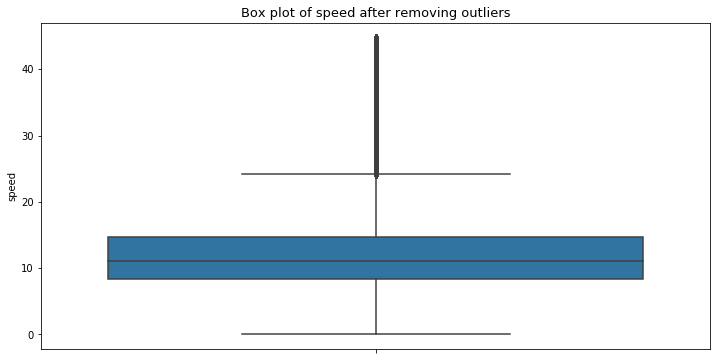

In [82]:
plt.figure(figsize=(12,6))

sns.boxplot( y="speed", data = data )
plt.title('Box plot of speed after removing outliers',size=13)

plt.show()

## total_amount

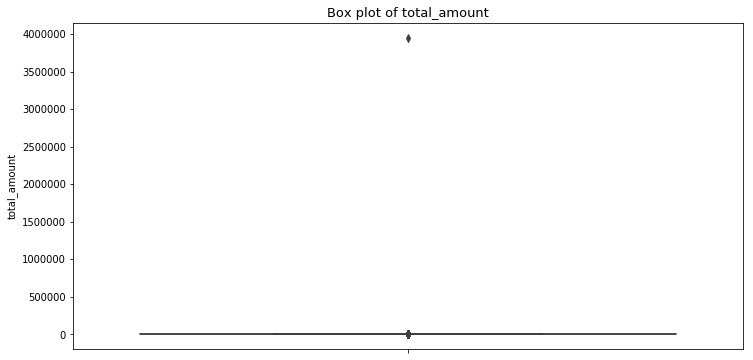

In [83]:
plt.figure(figsize=(12,6))

sns.boxplot( y="total_amount", data = data )
plt.title('Box plot of total_amount',size=13)

plt.show()

In [84]:
# Calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    
    var = data["total_amount"].values
    var = np.sort( var, axis = None )
    
    print( i,"th percentile value is : ", var[ int( len(var) * ( float(i) / 100 ) )])
    
print ("100 percentile value is ", var[-1])

0 th percentile value is :  -242.55
10 th percentile value is :  6.35
20 th percentile value is :  7.8
30 th percentile value is :  8.8
40 th percentile value is :  9.8
50 th percentile value is :  11.16
60 th percentile value is :  12.8
70 th percentile value is :  14.8
80 th percentile value is :  18.3
90 th percentile value is :  25.74
100 percentile value is  3950611.6


In [85]:
# There is a very high change from 90 th to 100 th percentile
for i in range(90, 100):
    
    var = df1["total_amount"].values
    var = np.sort( var, axis = None )
    
    print( i,"th percentile value is : ", var[ int( len(var) * ( float(i) / 100 ) )])
    
print ("100 percentile value is ", var[-1])

90 th percentile value is :  26.0
91 th percentile value is :  27.8
92 th percentile value is :  29.75
93 th percentile value is :  32.3
94 th percentile value is :  35.6
95 th percentile value is :  39.17
96 th percentile value is :  43.36
97 th percentile value is :  49.8
98 th percentile value is :  58.13
99 th percentile value is :  68.13
100 percentile value is  3950611.6


In [86]:
for i in np.arange(0.0, 1.0, 0.1):
    
    var = data["total_amount"].values
    var = np.sort(var,axis = None)
    
    print(99+i,"th percentile value is : ", var[ int( len(var) * ( float(99+i) / 100 )) ])
print("100 th percentile value is ",var[-1])

99.0 th percentile value is :  65.8
99.1 th percentile value is :  67.25
99.2 th percentile value is :  68.64
99.3 th percentile value is :  69.6
99.4 th percentile value is :  69.73
99.5 th percentile value is :  69.73
99.6 th percentile value is :  69.76
99.7 th percentile value is :  72.46
99.8 th percentile value is :  75.05
99.9 th percentile value is :  86.55
100 th percentile value is  3950611.6


Since 99.99 percentile has a larger change as compared to 99.7 and 99.8

99.9th percentile value does not look like an outlier, as there is not much difference between the 99.8th percentile and 99.9th percentile, we move on to do graphical analyis

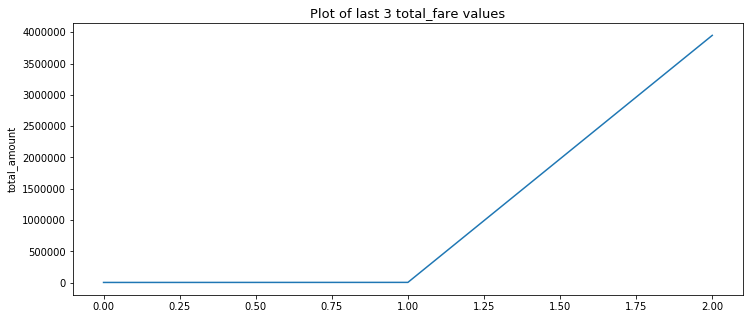

In [87]:
plt.figure(figsize=(12,5))

plt.plot(var[-3:])
plt.ylabel('total_amount')
plt.title('Plot of last 3 total_fare values', size=13)
plt.show()

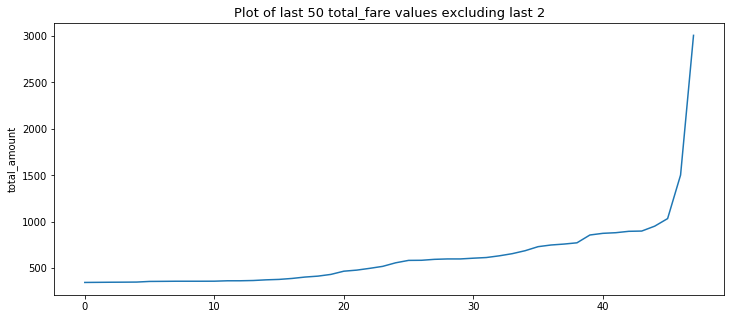

In [88]:
plt.figure(figsize=(12,5))

plt.plot(var[-50:-2])
plt.ylabel('total_amount')
plt.title('Plot of last 50 total_fare values excluding last 2', size=13)

plt.show()

 Excluding last 2 points and seeing last 50 points we see there is a drastic increase after total_fare = 1000

In [89]:
data = data [( data.total_amount > 0 ) & ( data.total_amount < 1000 )]

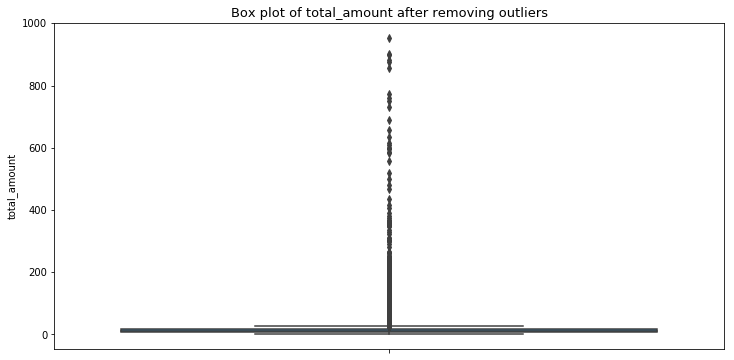

In [90]:
plt.figure(figsize=(12,6))

sns.boxplot( y="total_amount", data = data )
plt.title('Box plot of total_amount after removing outliers',size=13)

plt.show()

### Removing all outliers

In [91]:
# Function to Removing all outliers based on our univariate analysis above
def routlier(dx):

    
    a = dx.shape[0]
    print ("Number of pickup records = ",a)
    
    temp = dx[((dx.dropoff_longitude >= -74.15) & (dx.dropoff_longitude <= -73.7004) &\
                       (dx.dropoff_latitude >= 40.5774) & (dx.dropoff_latitude <= 40.9176)) & \
                       ((dx.pickup_longitude >= -74.15) & (dx.pickup_latitude >= 40.5774)& \
                       (dx.pickup_longitude <= -73.7004) & (dx.pickup_latitude <= 40.9176))] 
    b = temp.shape[0]
    print ("No. of outlier coordinates lying outside NY boundaries : ",(a-b))

    
    temp = dx [( dx.trip_time > 0) & ( dx.trip_time < 720)]
    c = temp.shape[0]
    print ("No. of outliers from trip times analysis:",(a-c))
    
    
    temp = dx [( dx.trip_distance > 0) & ( dx.trip_distance < 23 )]
    d = temp.shape[0]
    print ("No. of outliers from trip distance analysis:",(a-d))
    
    
    temp = dx [( dx.speed <= 65 ) & ( dx.speed >= 0 )]
    e = temp.shape[0]
    print ("No. of outliers from speed analysis:",(a-e))
    
    
    temp = dx[( dx.total_amount <1000 ) & ( dx.total_amount >0 )]
    f = temp.shape[0]
    print ("No. of outliers from fare analysis:",(a-f))
    
    
    dx = dx[(( dx.dropoff_longitude >= -74.15) & ( dx.dropoff_longitude <= -73.7004) &\
                       ( dx.dropoff_latitude >= 40.5774) & ( dx.dropoff_latitude <= 40.9176)) & \
                       (( dx.pickup_longitude >= -74.15) & ( dx.pickup_latitude >= 40.5774)& \
                       ( dx.pickup_longitude <= -73.7004) & ( dx.pickup_latitude <= 40.9176 ))]
    
    dx = dx[( dx.trip_time > 0) & ( dx.trip_time < 720)]
    dx = dx[( dx.trip_distance > 0) & ( dx.trip_distance < 23)]
    dx = dx[( dx.speed < 45.31) & ( dx.speed > 0)]
    dx = dx[( dx.total_amount <1000) & ( dx.total_amount >0)]
    
    print ("Total outliers removed : ",a - dx.shape[0])
    
    return dx

In [92]:
dataf = routlier( df1 )

print("Fraction of data points that remain after removing outliers", float( len(dataf) ) / len(df1) )

Number of pickup records =  12748986
No. of outlier coordinates lying outside NY boundaries :  293919
No. of outliers from trip times analysis: 23889
No. of outliers from trip distance analysis: 92597
No. of outliers from speed analysis: 24473
No. of outliers from fare analysis: 5275
Total outliers removed :  377910
Fraction of data points that remain after removing outliers 0.9703576425607495


We will have to break areas of NY into regions / clusters based on latitude and longitude so that we can find where # of Pickup is higher

We will also need to break time into bins and estimate no. of Pickups for every bins

Regions ( NY ) , Time Bins ( 10 min )  --->  # of Pickups

## Preparing Data

We can use K-Means to break NY into regions/ clusters

One of the interesting properties of K-Means is that:

    Suppose, if we divide 5K points into 5 clusters, size of those 5 clusters will almost be the same

    Also those areas ( based on latitude and longitude ) which have more pickups will be densely connected
    
Here, size means number of points ( datapoints or pickups )

Here it dosen't mean we are dividing the geographical area of NY into equal size regions/ clusters. Here we divide regions based on Pickup points

For example: Assume R1, R2, R3, R4 and R5 be geographical areas in NY of equal size :
    
    R1 having Pickups = 70
    R2 having Pickups = 75
    R3 having Pickups = 70
    R4 having Pickups = 25
    R5 having Pickups = 35

Size of cluster R1, R2, R3 will be smaller as one region contains enough pickup<br>
And Size of cluster R4 + R5 would be larger as they combined have high pickup as other regions ( since individually they don't have high pickups )


We want our maximum Inter Cluster distance ( Distance bw center of each cluster ) to be < 2 miles, <br>
Since we can cover 2 miles in 10 mins ( based on Univariate Analysis of Speed ) <br>

But we also don't want our cluster to be very tiny<br>
So we say minimum Inter Cluster distance to be > 0.5 miles
 
We do this because, If we are in one region/ cluster we can go to other region in 10 minutes ( since they are 2 miles away )

### Creating Clusters

In [93]:
from sklearn.cluster import MiniBatchKMeans, KMeans
# It turns out that there is a modified K-Means algorithm which is far more efficient than the original algorithm. 
# The algorithm is called Mini Batch K-Means clustering. It is mostly useful in web applications where the....
# ...amount of data can be huge, and the time available for clustering maybe limited.

import gpxpy.geo  # pip install gpxpy
# Get the haversine distance
# this lib is used while we calculate the straight line distance between two (lat,lon) pairs in miles

# Ref : https://algorithmicthoughts.wordpress.com/2013/07/26/machine-learning-mini-batch-k-means/

In [94]:
# Trying different cluster sizes to choose the right K in K-means

coords = dataf[['pickup_latitude', 'pickup_longitude']].values
neigh = []

def clusters( i ):
    
    kmeans = MiniBatchKMeans( n_clusters=i, batch_size=10000, random_state=42 )
    kmeans.fit( coords )
   
    dataf['pickup_cluster'] = kmeans.predict( dataf[['pickup_latitude', 'pickup_longitude']] )
    
    clusterCenters = kmeans.cluster_centers_
    clusterlen = len( clusterCenters )
    
    return clusterCenters, clusterlen


def minDist( clusterCenters, clusterlen ):
    
    cpts = 0     # Correct points, less than 2 miles
    wpts = 0     # Wrong points, more than 2 miles
    
    l2 = []     # l2 : less than 2 miles
    m2 = []     # m2 : more than 2 miles
    
    minD = 1000
    
    for i in range( 0, clusterlen ):
        cpts = 0
        wpts = 0
        
        for j in range(0, clusterlen):
            
            if i != j:
                
                distance = gpxpy.geo.haversine_distance( clusterCenters[i][0], clusterCenters[i][1],\
                                                         clusterCenters[j][0], clusterCenters[j][1] )
                # gpxpy.geo.haversine_distance : gives distance between two latitudes and longitudes in meters. 
                # Since, distance is in meters we have to convert it into miles.
                # 1 m = 1/1000 km    =>    1 km = 1 * 1.60934 mi    => 1 m = 1/( 1.60934 * 1000 )  mi
                
                minD = min( minD, distance / ( 1.60934 * 1000 ))
                
                if ( distance / (1.60934*1000) ) <= 2:    # if min distance <= 2 miles
                    cpts +=1
                else:
                    wpts += 1
                    
        l2.append(cpts)
        m2.append(wpts)
        
    neigh.append( l2 )
    
    print(" Cluster size : ", clusterlen )
    print(" Avg. No. of clusters within the vicinity (i.e. intercluster-distance < 2 miles) : ", np.ceil( sum(l2) / len(l2) ))
    print(" Avg. No. of clusters outside the vicinity (i.e. intercluster-distance > 2 miles) :", np.ceil( sum(m2) / len(m2) ))
    print(" Min inter-cluster distance = ", minD )
    print('\n')

In [95]:
for i in range(10, 100, 10):
    
    clusterCenters, clusterlen = clusters(i)
    
    minDist( clusterCenters, clusterlen )            

 Cluster size :  10
 Avg. No. of clusters within the vicinity (i.e. intercluster-distance < 2 miles) :  2.0
 Avg. No. of clusters outside the vicinity (i.e. intercluster-distance > 2 miles) : 8.0
 Min inter-cluster distance =  1.0945442325142543


 Cluster size :  20
 Avg. No. of clusters within the vicinity (i.e. intercluster-distance < 2 miles) :  4.0
 Avg. No. of clusters outside the vicinity (i.e. intercluster-distance > 2 miles) : 16.0
 Min inter-cluster distance =  0.7131298007387813


 Cluster size :  30
 Avg. No. of clusters within the vicinity (i.e. intercluster-distance < 2 miles) :  8.0
 Avg. No. of clusters outside the vicinity (i.e. intercluster-distance > 2 miles) : 22.0
 Min inter-cluster distance =  0.5185088176172206


 Cluster size :  40
 Avg. No. of clusters within the vicinity (i.e. intercluster-distance < 2 miles) :  8.0
 Avg. No. of clusters outside the vicinity (i.e. intercluster-distance > 2 miles) : 32.0
 Min inter-cluster distance =  0.5069768450363973


 Clus

The way to choose no. of clusters is such that, there are more no. of cluster regions that are closer to any cluster center
 and  we need to make sure that the minimum inter cluster should not be very less
    
    
The main objective was to find a optimal min. distance (Which roughly estimates to the radius of a cluster) between the clusters which we got was 40

In [96]:
kmeans = MiniBatchKMeans( n_clusters=40, batch_size=10000, random_state=0 )
kmeans.fit(coords)

dataf['pickup_cluster'] = kmeans.predict( dataf[['pickup_latitude', 'pickup_longitude']] )

clusterCenters = kmeans.cluster_centers_
clusterlen = len( clusterCenters )



In [97]:
clusterCenters[1]

array([ 40.70666981, -73.79280567])

In [98]:
import folium

m = folium.Map(location=[40.734695, -73.990372], tiles='OpenStreetMap')

for i in range( clusterlen ):
    folium.Marker( list(( clusterCenters[i][0], clusterCenters[i][1])), \
                  popup = ( str( clusterCenters[i][0] ) + str( clusterCenters[i][1] )) ).add_to(m)
m

In the above map the marker represent the center of each cluster

### Plotting Clusters

In [99]:
# Visualising the clusters on a map
def plotC( f ):
    
    citylongB = (-74.03, -73.75)   # NYC longitude boundary
    citylatB = (40.63, 40.85)      # NYC latitude boundary
    
    fig, ax = plt.subplots( ncols=1, nrows=1, figsize=(12,6) )
    
    # Only taking 100K pts.
    ax.scatter( f.pickup_longitude.values[:100000], f.pickup_latitude.values[:100000], s=10, lw=0,\
               c=f.pickup_cluster.values[:100000], cmap='tab20c', alpha=0.2)
    
    ax.set_xlim(citylongB)
    ax.set_ylim(citylatB)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

					 Various Clusters in NYC


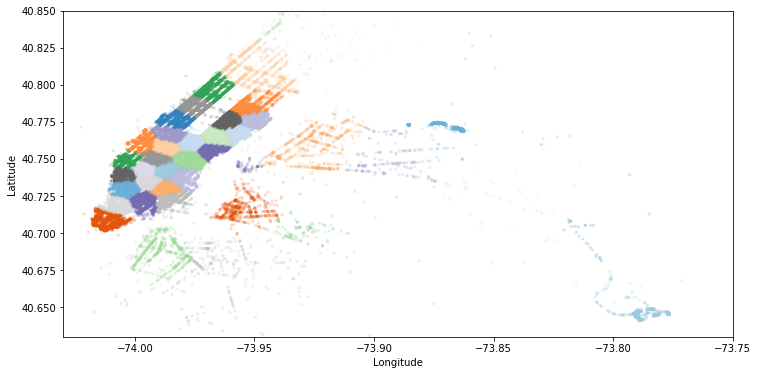

In [100]:
print('\t\t\t\t\t Various Clusters in NYC')
plotC(dataf)

### Time Binning

In [101]:
# Unix Timestamp : Basically counts no. of seconds since Jan 1, 1970 in UTC 
# For example :-
# 1420070400 : 2015-01-01 00:00:00 
# 1422748800 : 2015-02-01 00:00:00 
# 1425168000 : 2015-03-01 00:00:00

# 1451606400 : 2016-01-01 00:00:00 
# 1454284800 : 2016-02-01 00:00:00 
# 1456790400 : 2016-03-01 00:00:00


# Here we break up time in 10 min. interval ( 10 min. bins ) 
# 10 min in sec is 600 sec

def bins( dx, month, year ):
    
    pickupT = [ i for i in dx['pickup_time'].values ]
    
    unixT = [[1420070400],[1451606400,1454284800,1456790400]]
    
    pickupUT = unixT[year-2015][month-1]
    
    
    timeBinnedUT = [ ( int(( i - pickupUT ) / 600 ) + 33 ) for i in pickupT ]
    # ( int(( i - pickupUT ) / 600 ) + 33 ) : our Unix Time is in GMT so we convert it to EST
    
    dx['pickup_bins'] = np.array( timeBinnedUT )
    
    return dx


# Ref : https://www.unixtimestamp.com/
# Ref : https://www.timeanddate.com/time/zones/est

In [102]:
dataJan15 = bins( dataf, 1, 2015 )
dataJan15.head(2)

# pickup_cluster : to which cluster it belogns to 
# pickup_bins : to which 10 min interval the trip belongs to

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_time,pickup_time,speed,pickup_cluster,pickup_bins
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421329e+09,5.285319,34,2130
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420902e+09,9.983193,2,1419


In [103]:
jan15group = dataJan15[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()
jan15group.head()

# we divided the whole month (JAN) time into 10 min intervals 
# i,e;  24 (hrs) * 31 (days) * 60 (mins) / 10 (mins) = 4464 bins
# That means we much have 4464 unique bins

trip_distance
pickup_cluster pickup_bins               
0              1                      105
               2                      199
               3                      208
               4                      141
               5                      155

In [104]:
print( ' No. of Unique pickup_bins : ', len(np.unique(dataJan15['pickup_bins'] )))

 No. of Unique pickup_bins :  4464


In [105]:
def prep( dx1, kmeans, mno, yno ): 
    
    # Removing outliers
    dxf = routlier( dx1 )
    
    # Calculating Clusters
    dxf['pickup_cluster'] = kmeans.predict( dxf[['pickup_latitude', 'pickup_longitude']] )
    
    # Performing Time Binning and finalising data
    dxfinal = bins( dxf, mno, yno )
    dxfgroup = dxfinal[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()
    
    return dxfinal, dxfgroup

In [106]:
jan16 = dd.read_csv('yellow_tripdata_2016-01.csv')

dx = newTime( jan16 )  # Return with trip times

In [107]:
dataJan16, jan16group = prep( dx, kmeans, 1, 2016 )

Number of pickup records =  10906858
No. of outlier coordinates lying outside NY boundaries :  214677
No. of outliers from trip times analysis: 27190
No. of outliers from trip distance analysis: 79742
No. of outliers from speed analysis: 21047
No. of outliers from fare analysis: 4991
Total outliers removed :  297784


In [77]:
feb16 = dd.read_csv('yellow_tripdata_2016-02.csv')

dx = newTime( feb16 )  # Return with trip times

In [78]:
dataFeb16, feb16group = prep( dx, kmeans, 2, 2016 )

Number of pickup records =  11382049
No. of outlier coordinates lying outside NY boundaries :  223161
No. of outliers from trip times analysis: 27670
No. of outliers from trip distance analysis: 81902
No. of outliers from speed analysis: 22437
No. of outliers from fare analysis: 5476
Total outliers removed :  308177


In [79]:
mar16 = dd.read_csv('yellow_tripdata_2016-03.csv')

dx = newTime( mar16 )  # Return with trip times

In [80]:
dataMar16, mar16group = prep( dx, kmeans, 3, 2016 )

Number of pickup records =  12210952
No. of outlier coordinates lying outside NY boundaries :  232444
No. of outliers from trip times analysis: 30868
No. of outliers from trip distance analysis: 87318
No. of outliers from speed analysis: 23889
No. of outliers from fare analysis: 5859
Total outliers removed :  324635


In [108]:
# For each cluster region we collect all the indices in 10 min intervals in which the pickups have happened

def uniqueBins( dx ):
    
    val = []
    
    for i in range( 0, 40 ):  # 40 is the optimal K (no. of clusters)
        dxf = dx[ dx['pickup_cluster'] == i]
        
        uni = list( set( dxf['pickup_bins'] ))
        uni.sort()
        val.append( uni )
        
    return val

# uniqueBins() : returns the indices of all the unique pickup_bins ( where there is a pickup for all the 40 clusters )

In [109]:
# for every month we get all indices of 10min intravels in which atleast one pickup got happened

jan15uni = uniqueBins( dataJan15 )

jan16uni = uniqueBins( dataJan16 )
feb16uni = uniqueBins( dataFeb16 )
mar16uni = uniqueBins( dataMar16 )

In [83]:
print( jan15uni[2][10:30] )
print( len( jan15uni[2] ) )
print( len(jan15uni) )

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
4434
40


In [84]:
# For each cluster no. of 10 min intervals we are calculating no. of 0 pickups

for i in range(40):
    print(" For cluster ",i+1 ," no. of 10 min intervals with 0 pickups : ", 4464 - len( set( jan15uni[i] )) )
    
# There are 4464 unique pickup_bins in Jan 15.
# jan15uni contains all the unique pickup_bins. It contains 40 sub list as there are 40 clusters
# and each sub list contains the ID of all the pickup_bins where pickup happened...
# .... in the clusters ( which is the index of that sub list )

 For cluster  1  no. of 10 min intervals with 0 pickups :  41
 For cluster  2  no. of 10 min intervals with 0 pickups :  1986
 For cluster  3  no. of 10 min intervals with 0 pickups :  30
 For cluster  4  no. of 10 min intervals with 0 pickups :  355
 For cluster  5  no. of 10 min intervals with 0 pickups :  38
 For cluster  6  no. of 10 min intervals with 0 pickups :  154
 For cluster  7  no. of 10 min intervals with 0 pickups :  35
 For cluster  8  no. of 10 min intervals with 0 pickups :  34
 For cluster  9  no. of 10 min intervals with 0 pickups :  118
 For cluster  10  no. of 10 min intervals with 0 pickups :  41
 For cluster  11  no. of 10 min intervals with 0 pickups :  26
 For cluster  12  no. of 10 min intervals with 0 pickups :  45
 For cluster  13  no. of 10 min intervals with 0 pickups :  43
 For cluster  14  no. of 10 min intervals with 0 pickups :  29
 For cluster  15  no. of 10 min intervals with 0 pickups :  27
 For cluster  16  no. of 10 min intervals with 0 pickups : 

### Handling missing data ( Filling and Smoothing )

Since we have clusters with various no. of 10 min intervals with 0 pickups that means we have some missing data

There are two ways to fill up these values

1. Fill the missing value with 0's <br><br>
    
2. Fill the missing values with the avg values
        
    Case 1:(values missing at the start)  
   Ex1: ...... x =>..... ceil( x / 4 ), ceil( x / 4 ), ceil( x / 4 ), ceil( x / 4 ) <br> 
    Ex2: ....... x =>....... ceil( x / 3 ), ceil( x / 3 ), ceil( x / 3 ) <br>

    Case 2:(values missing in middle) 
    <br>Ex1: x....... y =>....... ceil( (x+y) / 4 ), ceil( (x+y) / 4 ), ceil( (x+y) / 4 ), ceil( (x+y) / 4 ) 
    <br> Ex2: x...... y =>....... ceil( (x+y) / 5 ), ceil( (x+y) / 5 ), ceil( (x+y) / 5 ), ceil( (x+y) / 5 ), ceil( (x+y) / 5 )
    <br><br>
     Case 3:(values missing at the end)  
     Ex1: x...... =>...... ceil( x / 4 ), ceil( x / 4 ), ceil( x / 4 ), ceil( x / 4 ) 
     <br> Ex2: x..... =>...... ceil( x / 2 ), ceil( x / 2 ) 


In [110]:
# Approach 1 :  Fill 0 for every bin where no pickup data is present. 

def fill0(count,vals):
    
    freig = []  # Final filled region/ smoothed region
    ind = 0
    
    for c in range(0,40):   # since optimal k = 40 ( 40 clusters ) 
        
        fbins=[] 
        for i in range(4464):  # 4464 : unique pickup_bins in Jan 15
            
            if i in vals[c]:
                fbins.append(count[ind])
                ind += 1
            else:
                fbins.append(0)
                
        freig.extend(fbins)
        
    return freig

# Overview of the function fill0() :
# for every 10 min interval(pickup_bin) we will check if it is there in our unique bin,
#       if it is there, we add the count[ind] to new data
#       if not, we add 0 to the new data
# we finally return new data

# count: no. of pickups that happened in each region/cluster for each 10 min interval
# vals: no. of unique bins

In [111]:
# Approach 2 : Fill the missing values with the avg values

# count: no. of pickups that happened in each region/cluster for each 10 min interval
# vals: no. of unique bins

def fillavg( count, vals ):
    
    freig = [] # Final filled region/smoothed values of each reigion
    ind = 0
    repeat = 0 
    fval = 0
    
    for c in range(0,40):   # since optimal k = 40 ( 40 clusters )
        
        fbins = []   # stores the final filled/ smoothed values
        repeat = 0
        
        for i in range(4464):   # 4464 : unique pickup_bins in Jan 15
            
            if repeat != 0:   # prevents iteration for a value which is already visited/resolved
                repeat -= 1
                continue
                
            if i in vals[c]:   # if the pickup_bin exists then, append the value of the pickup_bin
                fbins.append( count[ind] )
                
            else:
                if i != 0:
                    rlimit = 0
                    
                    for j in range(i,4464):
                        if  j not in vals[c]:  # searches for the left-limit or the pickup-bin value which has a pickup value
                            continue
                        else:
                            rlimit = j
                            break
                            
                    if rlimit == 0:
            # Case 3 : When we have the last/last few values are found to be missing,hence we have no right-limit here
                        fval = count[ind - 1] * 1.0 / ( (4463-i) + 2 ) * 1.0
                
                        for j in range(i,4464):                              
                            fbins.append( math.ceil( fval ))
                        
                        fbins[i-1] = math.ceil( fval )
                        repeat = ( 4463 - i )
                        ind -= 1
                        
                    else:   # if rlimit != 0 ( i != 0 )
            # Case 2 : When we have the missing values between two known values
            
                        fval = ( count[ind-1] + count[ind] ) * 1.0 / (( rlimit - i ) + 2 ) * 1.0             
                        
                        for j in range( i, rlimit+1 ):
                            fbins.append( math.ceil( fval ))
                        
                        fbins[i-1] = math.ceil( fval )
                        repeat = ( rlimit - i )
                        
                else:  # if i == 0
            # Case 1 : When we have the first/first few values are found to be missing,hence we have no left-limit here
                    rlimit = 0
                    
                    for j in range(i,4464):
                        if  j not in vals[c]:
                            continue
                        else:
                            rlimit = j
                            break
                            
                    fval = count[ind] * 1.0 / (( rlimit - i ) + 1 ) * 1.0
                    
                    for j in range( i, rlimit+1 ):
                            fbins.append( math.ceil( fval ))
                    
                    repeat = ( rlimit - i )
            
            ind += 1
        freig.extend( fbins )
        
    return freig

# we multiply by 1.0 to convert an integer to float

# Overview of the function fillavg() :
# for every 10 min interval(pickup_bin) we will check it is there in a unique bin,
#         if it is there we will add the count[ind] to filled/smoothed data
#         if not we add filled/smoothed data (which is calc based on methods that are discussed above)
# we finally return the final filled/smoothed data

In [87]:
# No. of 10 min intervals for Jan 15 = 24 * 31 * 60 / 10 = 4464
# For each cluster we will have 4464 values, therefore 40 * 4464 = 178560 (length of the jan15fill0)

jan15fill0 = fill0( jan15group['trip_distance'].values, jan15uni )

len( jan15fill0 )

# In jan15group dataframe "trip_distance" represents the number of pickups that happened.
# jan15uni contains all the unique pickup_bins. It contains 40 sub list as there are 40 clusters
# and each sub list contains the ID of all the pickup_bins where pickup happened...
# .... in the clusters ( which is the index of that sub list )

178560

In [88]:
jan15fillavg = fillavg( jan15group['trip_distance'].values, jan15uni )

len( jan15fillavg )

178560

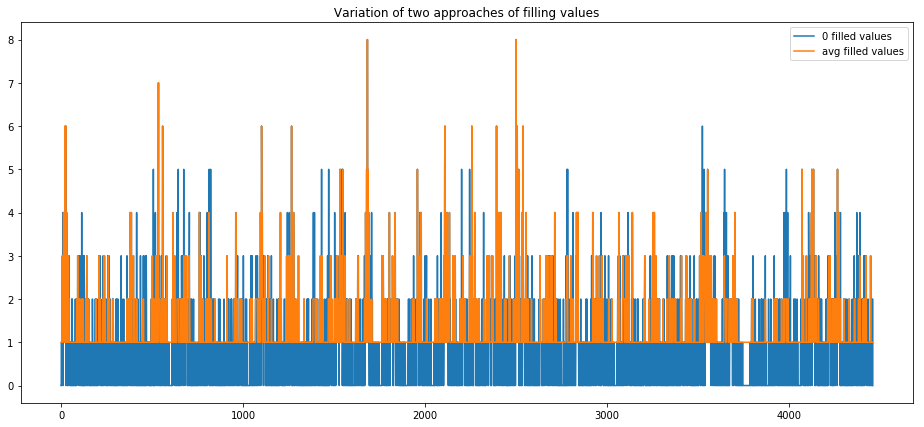

In [89]:
# fillavg (smoothing) vs fillo (filling)
# We take the no. of pickups for cluster region 2
# For each cluster we will have 4464 values Therefore for 2nd cluster 4464 - ( 4464*2 )

plt.figure(figsize=(16,7))

plt.plot( jan15fill0[4464:8928], label="0 filled values" )
plt.plot( jan15fillavg[4464:8928], label="avg filled values" )

plt.title(' Variation of two approaches of filling values ')
plt.legend()
plt.show()

<b>Why do we choose these methods and which method is used for which data ? </b>

 Consider we have data of same month in 2015 Jan => 10 ... ... ... 20 <br> i.e there are 10 pickups that are happened in 1st 
 10 min interval, 0 pickups happened in 2nd 10 min interval, 0 pickups happened in 3rd 10 min interval 
 and 20 pickups happened in 4th 10 min interval.<br>
 
     In fill0() method we replace these values like 10, 0, 0, 0, 20
     In fillavg() method we replace these values as 6, 6, 6, 6, 6   {( 10 + 0 + 0 + 0 + 20 ) / 5}
     
 If we can check the no. of pickups that happened in the 1st 40 min are same in both cases, but if you can observe that we looking at the future values 
 
 when we are using fillavg() we are looking at the future number of pickups which might cause a data leakage.

 So we use fillavg() for Jan 2015 data since it acts as our training data and we use simple fill0() method for 2016 data.

In [112]:
djan15 = jan15fillavg

djan16 = fill0( jan16group['trip_distance'].values, jan16uni )
dfeb16 = fill0( feb16group['trip_distance'].values, feb16uni )
dmar16 = fill0( mar16group['trip_distance'].values, mar16uni )

print( len(djan16), len(dfeb16), len(dmar16) ) 

# fill0(count,vals)

In [91]:
# Creating list of all values of pickup data of every bin region/cluster-wise 

combined = []

for i in range( 0, 40 ):
    combined.append( djan16[4464*i:4464*(i+1)] + dfeb16[4176*i:4176*(i+1)] + dmar16[4464*i:4464*(i+1)] )

# Cluster 1 = 0 - 4464,   Cluster 2 = 4464 - 4464 * 2,   Cluster 3 = 4464 * 2 - 4464 * 3 .......... 
# Why 4176 for Feb ?
# Hours in a day * No. of Days * Minuters in an Hour / 10 minutes
# No. of 10 min indices for Jan 16 = 24 * 31 * 60 / 10 = 4464
# No. of 10 min indices for Feb 16 = 24 * 29 * 60 / 10 = 4176
# No. of 10 min indices for Mar 16 = 24 * 31 * 60 / 10 = 4464

In [92]:
# combined : It will contain 40 lists, each list will contain 4464 + 4176 + 4464 values which represents the number of pickups 
print( combined[20][30:60] )
print( len( combined[30] ) )
len( combined )

[23, 26, 11, 27, 21, 13, 12, 11, 16, 19, 17, 13, 15, 5, 22, 9, 14, 11, 7, 8, 9, 12, 11, 12, 11, 10, 9, 10, 14, 16]
13104


40

We have chosen our error metric for comparison between models as <b>MAPE (Mean Absolute Percentage Error)</b> so that we can know that on an average how good is our model with predictions and <b>MSE (Mean Squared Error)</b> is also used so that we have a clearer understanding as to how well our forecasting model performs with outliers so that we make sure that there is not much of a error margin between our prediction and the actual value

## Baseline Models

Now we get into modelling in order to forecast the pickup densities for the months of Jan, Feb and March of 2016 for which we are using multiple models with two variations 
1. Using Ratios of the 2016 data to the 2015 data i.e $\begin{align} R_{t} = P^{2016}_{t}  /  P^{2015}_{t} \end{align}$
2. Using Previous known values of the 2016 data itself to predict the future values

In [86]:
# Preparing the Dataframe only with xi values as Jan 15 data and yi values as jan 16

import pandas as pd

rJan = pd.DataFrame()

rJan['Given'] = djan15       
rJan['Prediction'] = djan16 
rJan['Ratios'] = rJan['Prediction'] * 1.0 / rJan['Given'] * 1.0

rJan.head()

# Here, rJan['Given'] = Pt_2015 and rJan['Prediction'] = Pt_2016 
# * 1.0 to convert int to float
# djan15 : filled/smoothed pickup data "trip_distance"

,Given,Prediction,Ratios
0,53,0,0.000000
1,53,63,1.188679
2,199,217,1.090452
3,208,189,0.908654
4,141,137,0.971631


In [87]:
rJan.shape

(178560, 3)

In [88]:
print(" No. of 0's in Ratios     = ", rJan["Ratios"].value_counts()[0])
print(" No. of 0's in Prediction = ", rJan["Prediction"].value_counts()[0])

 No. of 0's in Ratios     =  10000
 No. of 0's in Prediction =  10000


In [89]:
rJan['Prediction'].values[2]

217

* We only use here the Jan 15 and Jan 16 data


### Simple Moving Averages

The First Model used is the Moving Averages Model which uses the previous n values in order to predict the next value <br> 
Using Ratio Values - $\begin{align}R_{t} = ( R_{t-1} + R_{t-2} + R_{t-3} .... R_{t-n} )/n \end{align}$

Here the Hyperparameter is the windowSize (n) which is tuned manually and it is found that the windowSize of 3 is optimal for getting the best results using Moving Averages using previous Ratio values therefore we get $\begin{align}R_{t} = ( R_{t-1} + R_{t-2} + R_{t-3})/3 \end{align}$

In [90]:
ratios = rJan

predRatio = ( ratios['Ratios'].values )[0]

error = []
predVals = []
predRatioVals = []

windowSize = 3

for i in range( 0 , 4464*40 ): # 24 (hrs) * 31 (days) * 60 (mins) / 10 (mins) = 4464 bins
   
    if i % 4464 == 0 :         # if start bin of another cluster 
        predRatioVals.append(0)
        predVals.append(0)
        error.append(0)
        continue
    
    predRatioVals.append( predRatio )
    predVals.append( int((( ratios['Given'].values )[i] ) * predRatio ))
    
    e = abs(( math.pow( int((( ratios['Given'].values )[i] ) * predRatio ) - ( ratios['Prediction'].values )[i], 1 )))
    # e = |  ( Given[i] * predRatio - Prediction[i] ) ^1   |
    error.append( e )
    
    if i+1 >= windowSize:
        predRatio = sum( (ratios['Ratios'].values)[(i+1)-windowSize : (i+1)] ) / windowSize
    else:
        predRatio = sum(( ratios['Ratios'].values )[0 : (i+1)] ) / (i+1)


# ratios['MA_R_Predicted'] = predicted_values
# ratios['MA_R_Error'] = error

mape = ( sum(error) / len(error) ) / ( sum( ratios['Prediction'].values ) / len( ratios['Prediction'].values ))
mse = sum( [ x**2 for x in error ] ) / len(error)

print(' MAPE (Mean Absolute Percentage Error) : ', mape)
print(' MSE (Mean Squared Error) : ', mse)

 MAPE (Mean Absolute Percentage Error) :  0.1821155173392136
 MSE (Mean Squared Error) :  400.0625504032258


Next we use the Moving averages of the 2016  values itself to predict the future value using $\begin{align}P_{t} = ( P_{t-1} + P_{t-2} + P_{t-3} .... P_{t-n} )/n \end{align}$

Here the Hyperparameter is the windowSize (n) which is tuned manually and it is found that the windowSize of 1 is optimal for getting the best results using Moving Averages using previous 2016 values therefore we get $\begin{align}P_{t} = P_{t-1} \end{align}$

In [91]:
ratios = rJan

prVal = ( ratios['Prediction'].values )[0]  # ratios['Prediction'] =  djan16 : filled/smoothed pickup data "trip_distance"
error = []
predVals = []
predRatioVals = []
windowSize = 1

for i in range( 0, 4464*40 ):
    
    predVals.append( prVal )
    
    e =  abs(( math.pow( prVal - ( ratios['Prediction'].values )[i], 1 )))
    # e = | ( prVal - Prediction[i] ) ^ 1 |
    error.append( e )
    
    if i+1 >= windowSize:
        prVal = int( sum( (ratios['Prediction'].values)[ (i+1)-windowSize : (i+1) ] ) / windowSize )
    else:
        prVal = int( sum( (ratios['Prediction'].values)[ 0 : (i+1) ]) / (i+1) )

#ratios['MA_P_Predicted'] = predicted_values
#ratios['MA_P_Error'] = error

mape = ( sum(error) / len(error) ) / ( sum( ratios['Prediction'].values ) / len( ratios['Prediction'].values ))
mse = sum( [ x**2 for x in error ] ) / len(error)

print(' MAPE (Mean Absolute Percentage Error) : ', mape)
print(' MSE (Mean Squared Error) : ', mse)

 MAPE (Mean Absolute Percentage Error) :  0.14292849686975506
 MSE (Mean Squared Error) :  174.84901993727598


### Weighted Moving Averages

The Moving Avergaes Model used gave equal importance to all the values in the window used, but we know intuitively that the future is more likely to be similar to the latest values and less similar to the older values.<br>
Weighted Averages converts this analogy into a mathematical relationship giving the highest weight (while computing the averages) to the latest previous value and decreasing weights to the subsequent older ones

Weighted Moving Averages using Ratio Values - $\begin{align}R_{t} = ( N*R_{t-1} + (N-1)*R_{t-2} + (N-2)*R_{t-3} .... 1*R_{t-n} )/(N*(N+1)/2) \end{align}$

Here the Hyperparameter is the windowSize (n) which is tuned manually and it is found that the windowSize of 5 is optimal for getting the best results using Weighted Moving Averages using previous Ratio values therefore we get $\begin{align} R_{t} = ( 5*R_{t-1} + 4*R_{t-2} + 3*R_{t-3} + 2*R_{t-4} + R_{t-5} )/15 \end{align}$

In [92]:
predRatio = ( ratios['Ratios'].values )[0]

alpha = 0.5
windowSize = 5

error = []
predVal = []
predRatioVals = []

for i in range( 0, 4464*40 ):
    
    if i % 4464 == 0:
        predRatioVals.append(0)
        predVal.append(0)
        error.append(0)
        continue
        
    predRatioVals.append( predRatio )
    predVal.append( int(( (ratios['Given'].values)[i] )* predRatio ))
    
    e = abs(( math.pow( int(( (ratios['Given'].values)[i] ) * predRatio ) - (ratios['Prediction'].values)[i], 1) ))
    # e = | ( Given[i] * predRatio - Prediction[i] )^ 1 |
    error.append( e )
    
    if i+1 >= windowSize:
        sumVals = 0
        sumCoeff = 0
        
        for j in range( windowSize, 0, -1 ):
            sumVals += j * (ratios['Ratios'].values)[i - windowSize + j]
            sumCoeff += j
            
        predRatio = sumVals / sumCoeff
        
    else:
        sumVals = 0
        sumCoeff = 0
        
        for j in range( i+1, 0, -1 ):
            sumVals += j * (ratios['Ratios'].values)[j-1]
            sumCoeff += j
            
        predRatio = sumVals / sumCoeff

        
mape = ( sum(error) / len(error) ) / ( sum( ratios['Prediction'].values ) / len( ratios['Prediction'].values ))
mse = sum( [ x**2 for x in error ] ) / len(error)

print(' MAPE (Mean Absolute % Error) : ', mape)
print(' MSE (Mean Squared Error) : ', mse)

 MAPE (Mean Absolute % Error) :  0.1784869254376018
 MSE (Mean Squared Error) :  384.01578741039424


Weighted Moving Averages using Previous 2016 Values - $\begin{align}P_{t} = ( N*P_{t-1} + (N-1)*P_{t-2} + (N-2)*P_{t-3} .... 1*P_{t-n} )/(N*(N+1)/2) \end{align}$

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 2 is optimal for getting the best results using Weighted Moving Averages using previous 2016 values therefore we get $\begin{align} P_{t} = ( 2*P_{t-1} + P_{t-2} )/3 \end{align}$

In [93]:
prVal = (ratios['Prediction'].values)[0] 
# ratios['Prediction'] =  djan16 : filled/smoothed pickup data "trip_distance"

error = []
predVals = []
windowSize = 2

for i in range( 0, 4464*40 ):
    
    predVals.append( prVal )
    
    e = abs(( math.pow( prVal - (ratios['Prediction'].values)[i], 1) ))
    # e = | ( prVal - Prediction[i] )^ 1 |
    error.append( e )
    
    if i+1 >= windowSize:
        sumVals = 0
        sumCoeff = 0
        
        for j in range( windowSize, 0, -1 ):
            sumVals += j * (ratios['Prediction'].values)[i - windowSize + j]
            sumCoeff += j
        prVal = int( sumVals / sumCoeff )

    else:
        sumVals = 0
        sumCoeff = 0
        
        for j in range( i+1, 0, -1 ):
            sumVals += j * (ratios['Prediction'].values)[j-1]
            sumCoeff += j
        prVal =int( sumVals /sumCoeff )
        
        
mape = ( sum(error) / len(error) ) / ( sum( ratios['Prediction'].values ) / len( ratios['Prediction'].values ))
mse = sum( [ x**2 for x in error ] ) / len(error)

print(' MAPE (Mean Absolute % Error) : ', mape)
print(' MSE (Mean Squared Error)     : ', mse)

 MAPE (Mean Absolute % Error) :  0.13551088436182082
 MSE (Mean Squared Error)     :  162.46707549283155


### Exponential  Weighted Moving Averages

Through Weighted average we have satisfied the analogy of giving higher weights to the latest value and decreasing weights to the subsequent ones but we still do not know which is the correct weighting scheme as there are infinetly many possibilities in which we can assign weights in a non-increasing order and tune the the hyperparameter windowSize.<br> To simplify this process we use Exponential Moving Averages which is a more logical way towards assigning weights and at the same time also using an optimal windowSize.

In exponential moving averages we use a single hyperparameter alpha $\begin{align}(\alpha)\end{align}$ which is a value between 0 & 1 and based on the value of the hyperparameter alpha the weights and the window sizes are configured.<br>
For eg. If $\begin{align}\alpha=0.9\end{align}$ then the number of days on which the value of the current iteration is based is~$\begin{align}1/(1-\alpha)=10\end{align}$ i.e. we consider values 10 days prior before we predict the value for the current iteration. Also the weights are assigned using $\begin{align}2/(N+1)=0.18\end{align}$ ,where N = number of prior values being considered, hence from this it is implied that the first or latest value is assigned a weight of 0.18 which keeps exponentially decreasing for the subsequent values.

<i> Ref :  https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average

<br>
$\begin{align}R^{'}_{t} = \alpha*R_{t-1} + (1-\alpha)*R^{'}_{t-1}  \end{align}$


In [94]:
predRatio = (ratios['Ratios'].values)[0]

alpha = 0.6
error = []
predVals = []
predRatioVals = []

for i in range( 0, 4464*40 ):
    
    if i % 4464==0:
        predRatioVals.append(0)
        predVals.append(0)
        error.append(0)
        continue
        
    predRatioVals.append( predRatio )
    predVals.append( int(( (ratios['Given'].values)[i] ) * predRatio ))
    
    e = abs(( math.pow( int(( (ratios['Given'].values)[i]) * predRatio ) - (ratios['Prediction'].values)[i], 1 ) ))
    # e = | ( Given[i] * predRatio - Prediction[i] )^ 1 |
    error.append( e )
    
    predRatio = ( alpha * predRatio ) + ( 1 - alpha ) * ( (ratios['Ratios'].values)[i] )

    
mape = ( sum(error) / len(error) ) / ( sum( ratios['Prediction'].values ) / len( ratios['Prediction'].values ))
mse = sum( [ x**2 for x in error ] ) / len(error)

print(' MAPE (Mean Absolute % Error) : ', mape)
print(' MSE (Mean Squared Error)     : ', mse)

 MAPE (Mean Absolute % Error) :  0.17783550194861494
 MSE (Mean Squared Error)     :  378.34610215053766


$\begin{align}P^{'}_{t} = \alpha*P_{t-1} + (1-\alpha)*P^{'}_{t-1}  \end{align}$

In [95]:
prVal = (ratios['Prediction'].values)[0]
# ratios['Prediction'] =  djan16 : filled/smoothed pickup data "trip_distance"

alpha = 0.3
error = []
predVals = []

for i in range( 0, 4464*40 ):
    
    if i % 4464 == 0:
        predVals.append(0)
        error.append(0)
        continue
        
    predVals.append( prVal )
    
    e = abs(( math.pow( prVal - (ratios['Prediction'].values)[i], 1 ) ))
    error.append( e )
    prVal = int( (alpha * prVal) + (1 - alpha) * ( (ratios['Prediction'].values)[i]) )
    
mape = ( sum(error) / len(error) ) / ( sum( ratios['Prediction'].values ) / len( ratios['Prediction'].values ))
mse = sum( [ x**2 for x in error ] ) / len(error)

print(' MAPE (Mean Absolute % Error) : ', mape)
print(' MSE (Mean Squared Error)     : ', mse)

 MAPE (Mean Absolute % Error) :  0.1350915263669572
 MSE (Mean Squared Error)     :  159.73614471326164


In [96]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = [" Baseline Model ", " MAPE ", " MSE "]

x.add_row( [ " Moving Averages (Ratios) ", " 0.182115517339 ", " 400.0625504032258 "] ) 
x.add_row( [ " Moving Averages (2016 vals) ", " 0.14292849687 ", " 174.84901993727598 " ] )
x.add_row(["","",""])
x.add_row( [ " Weighted Moving Averages (Ratios) ", " 0.178486925438 ", " 384.01578741039424 " ] )
x.add_row( [ " Weighted Moving Averages (2016 vals) ", " 0.135510884362 ", " 162.46707549283155 " ] )
x.add_row(["","",""])
x.add_row( [ " Exponential Moving Averages (Ratios) ", " 0.177835501949 ", " 378.34610215053766 "] ) 
x.add_row( [ " Exponential Moving Averages (2016 vals) ", " 0.135091526367 ", " 159.73614471326164 " ] )

print('\t\t Baseline Model comparisons using Jan15 and Jan16 data ')
print( x )

# Ref : http://zetcode.com/python/prettytable/

		 Baseline Model comparisons using Jan15 and Jan16 data 
+-------------------------------------------+------------------+----------------------+
|               Baseline Model              |       MAPE       |         MSE          |
+-------------------------------------------+------------------+----------------------+
|          Moving Averages (Ratios)         |  0.182115517339  |  400.0625504032258   |
|        Moving Averages (2016 vals)        |  0.14292849687   |  174.84901993727598  |
|                                           |                  |                      |
|     Weighted Moving Averages (Ratios)     |  0.178486925438  |  384.01578741039424  |
|    Weighted Moving Averages (2016 vals)   |  0.135510884362  |  162.46707549283155  |
|                                           |                  |                      |
|    Exponential Moving Averages (Ratios)   |  0.177835501949  |  378.34610215053766  |
|  Exponential Moving Averages (2016 vals)  |  0.135091526367 

From the above comparison we conclude that the best Baseline model is Exponential Moving Averages on 2016 vals

#### Plot of all Clusters and their pickup frequency in 10 min bins



			 Plots of all values of pickup data of every bin region/cluster-wise :- 


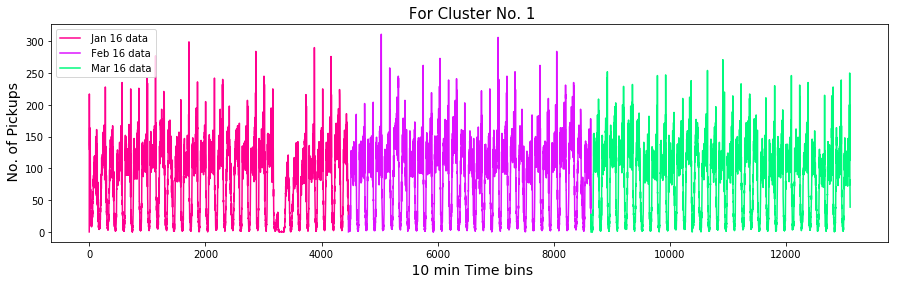

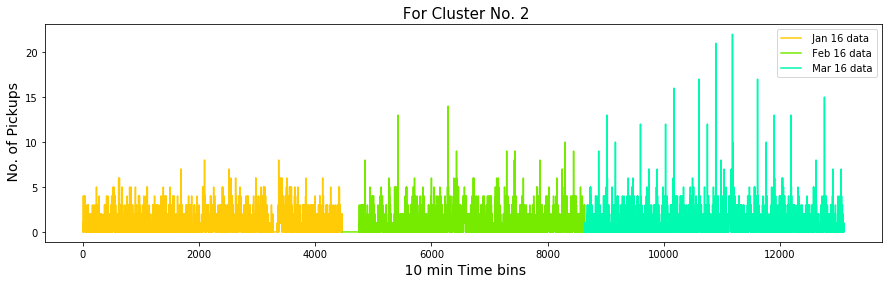

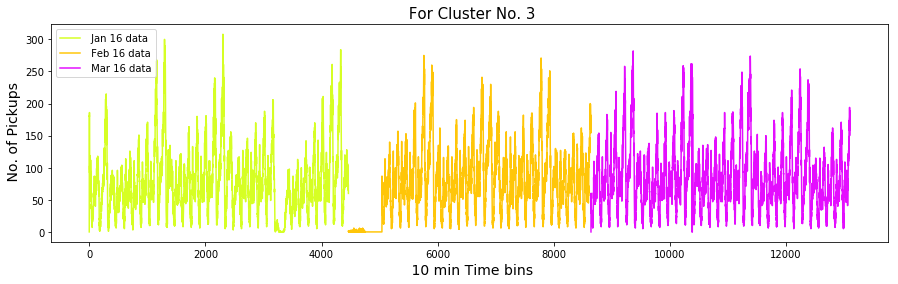

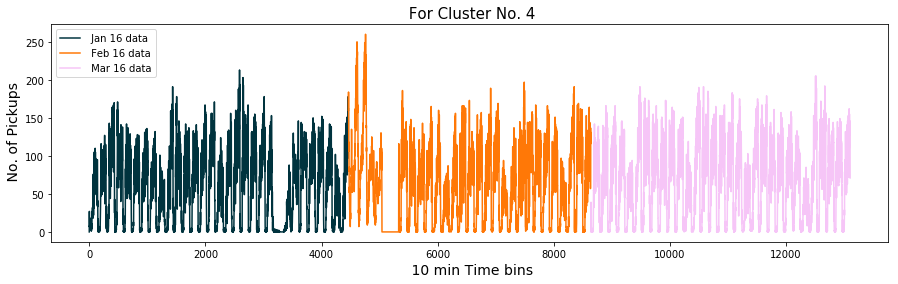

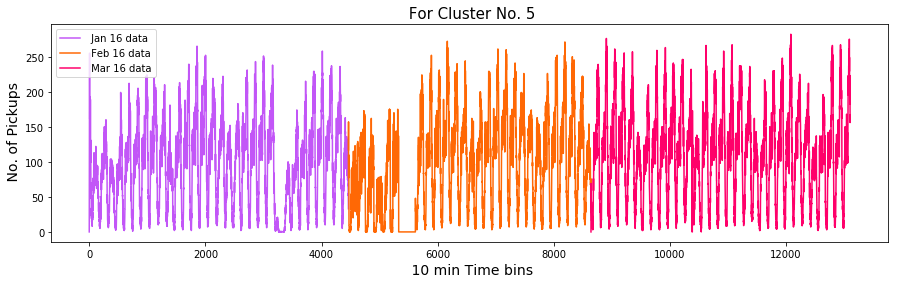

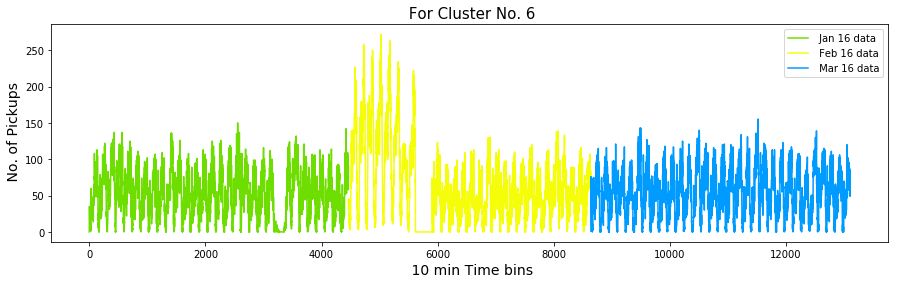

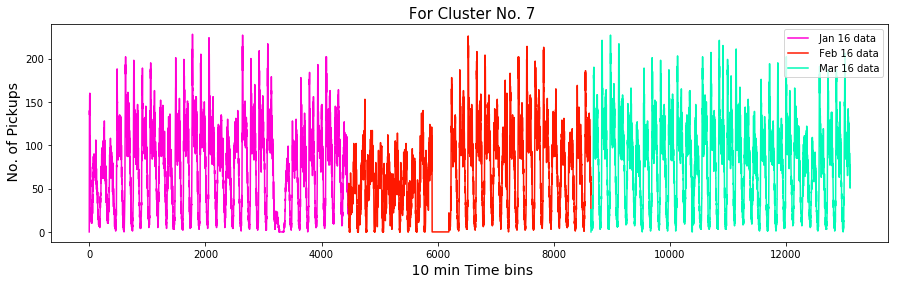

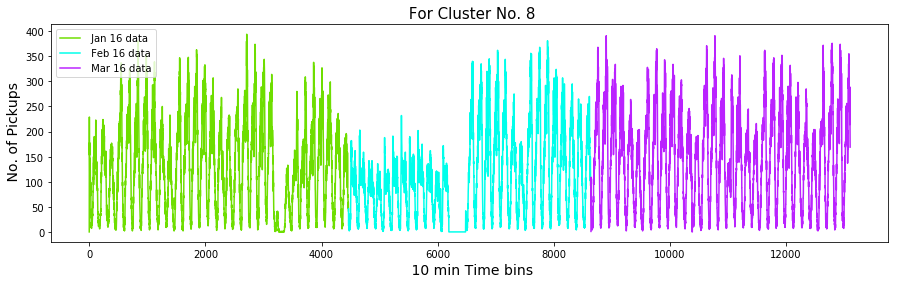

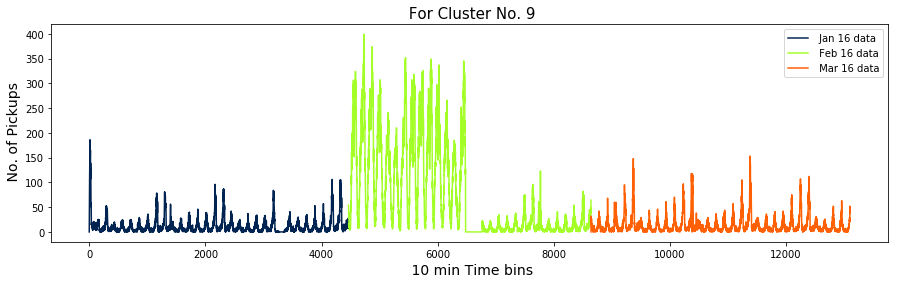

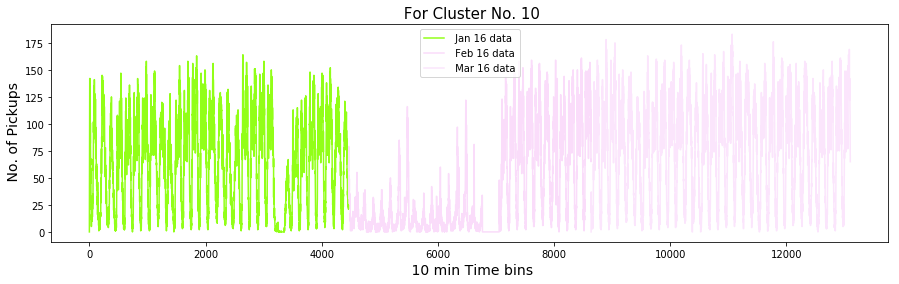

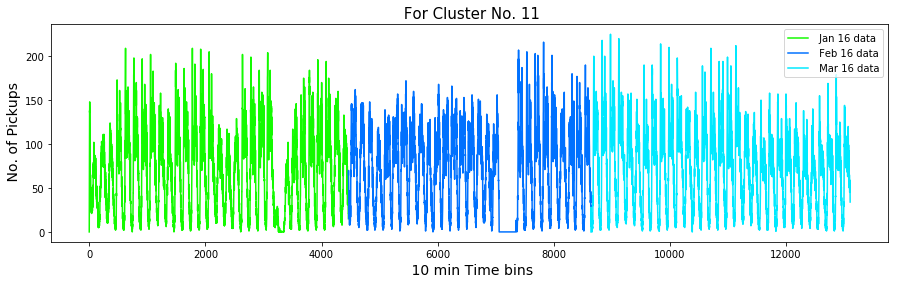

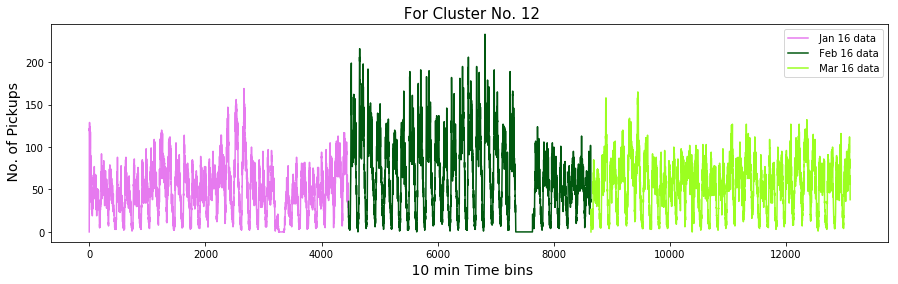

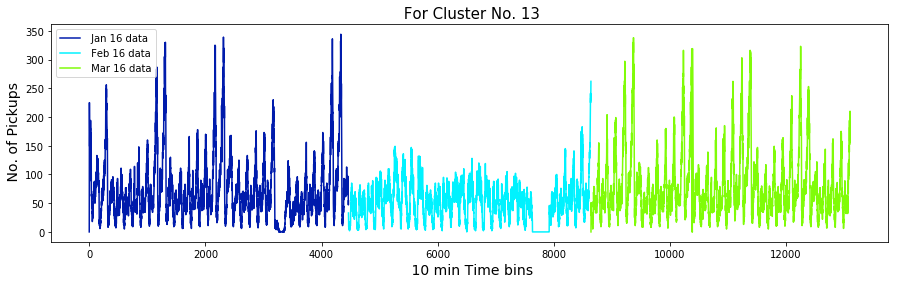

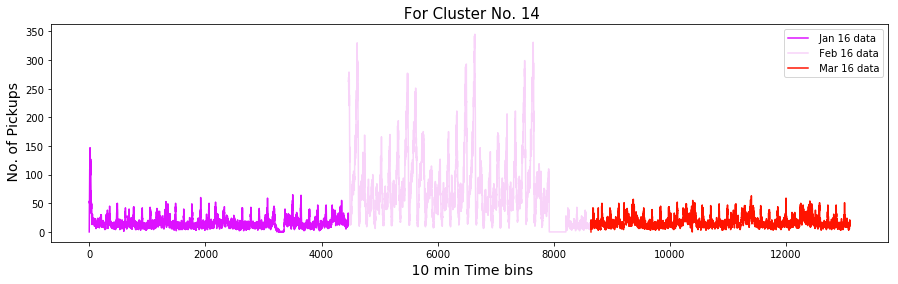

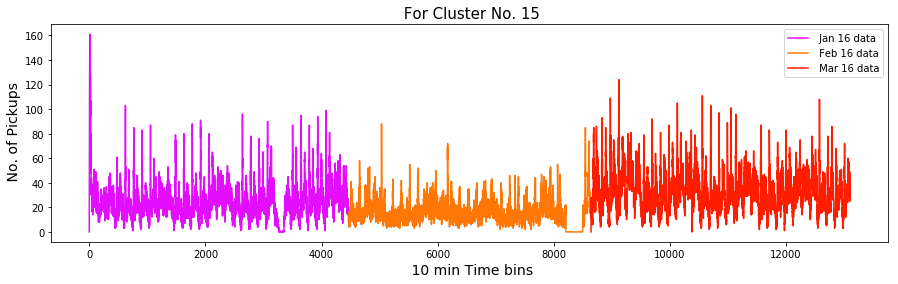

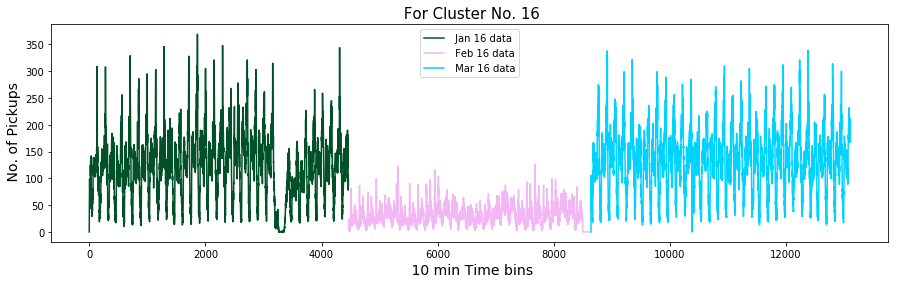

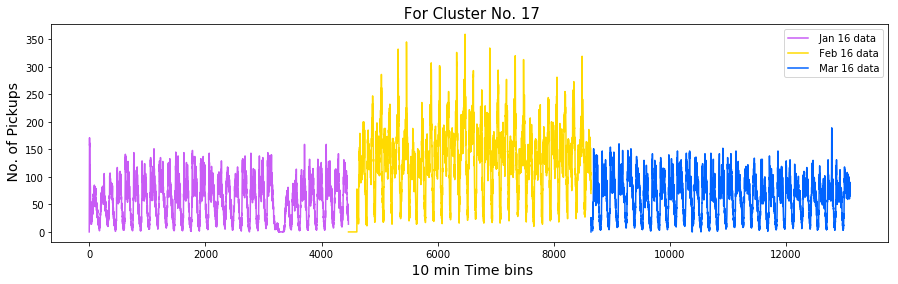

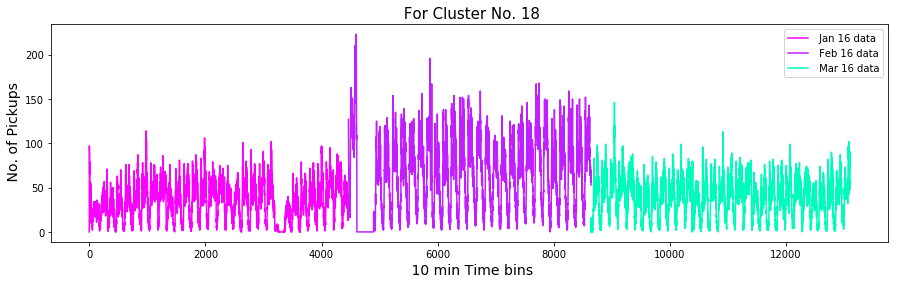

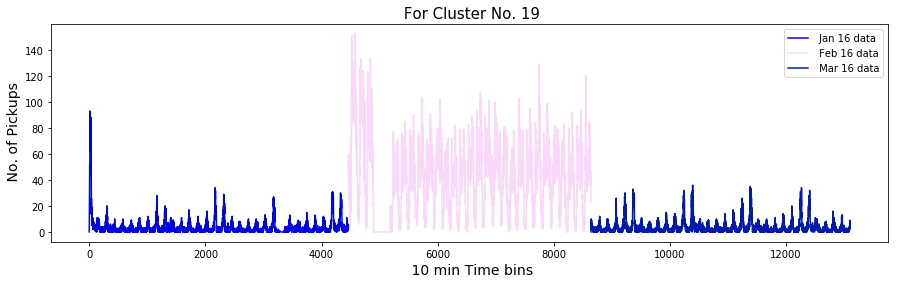

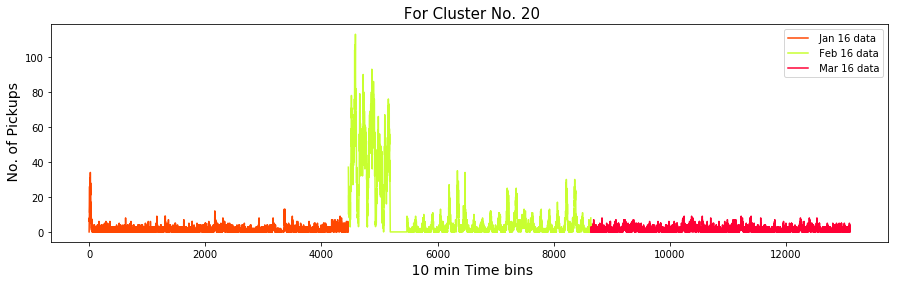

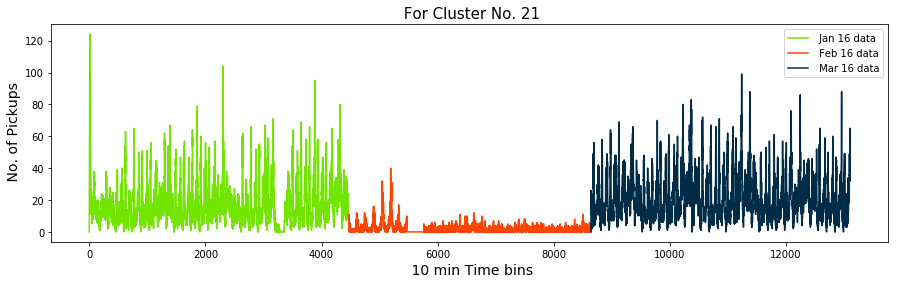

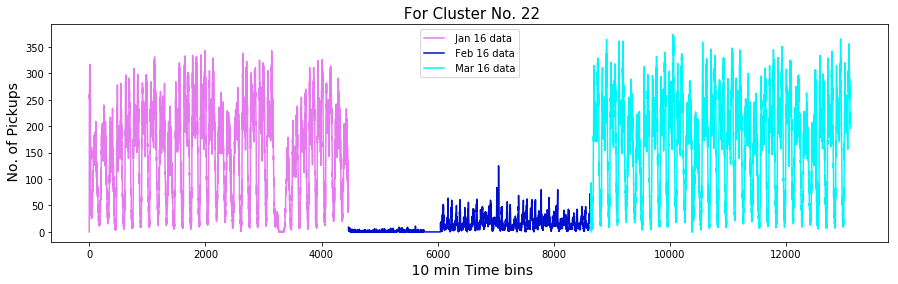

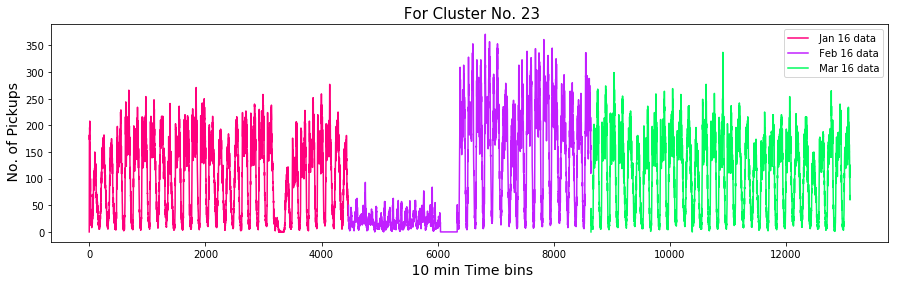

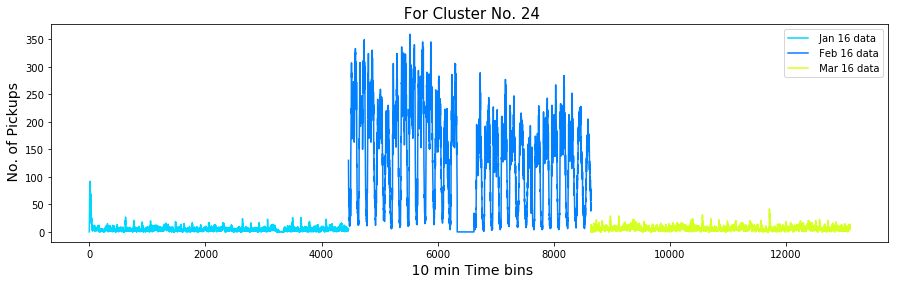

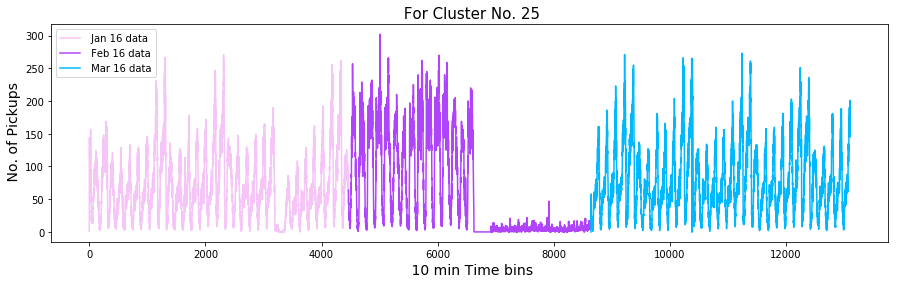

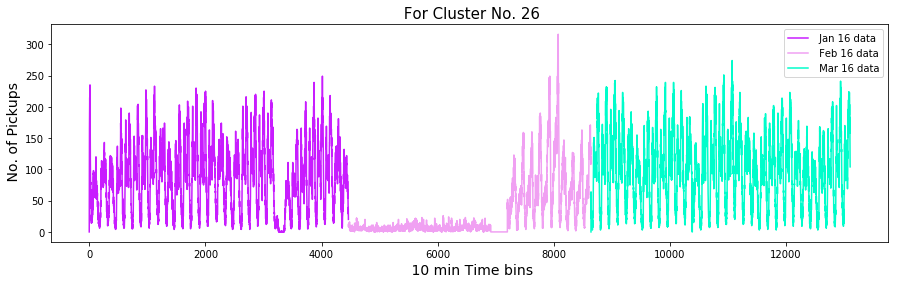

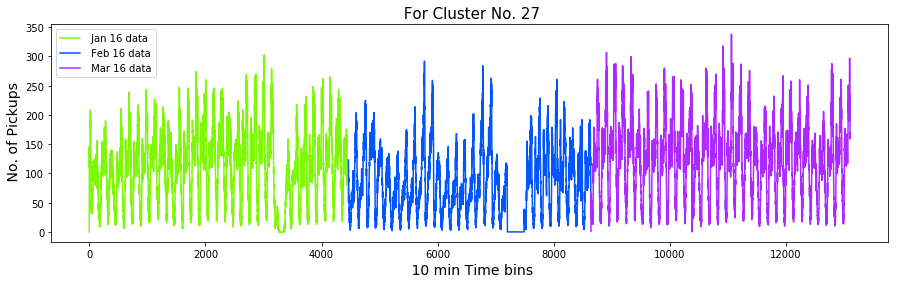

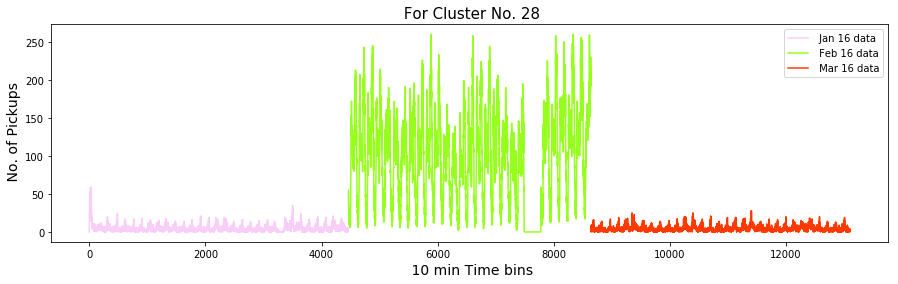

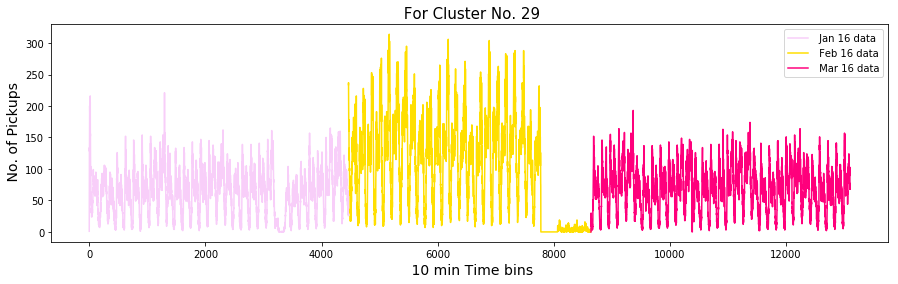

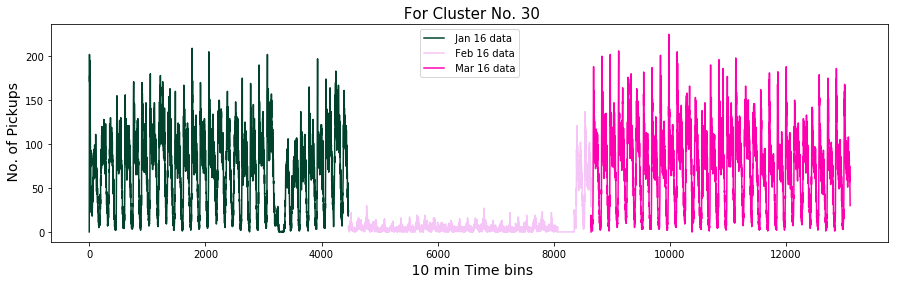

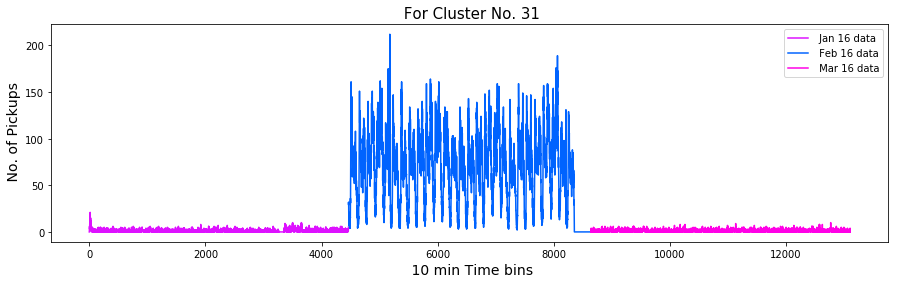

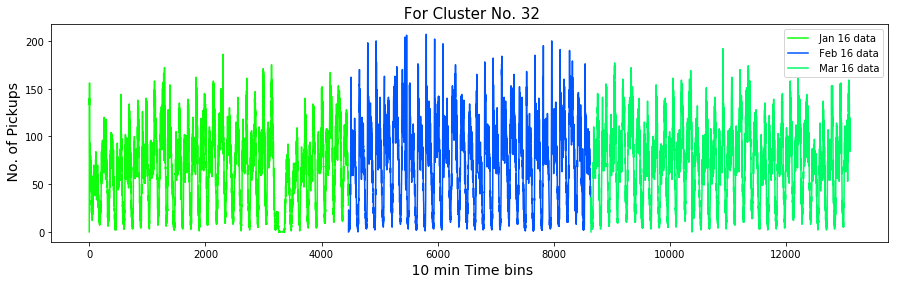

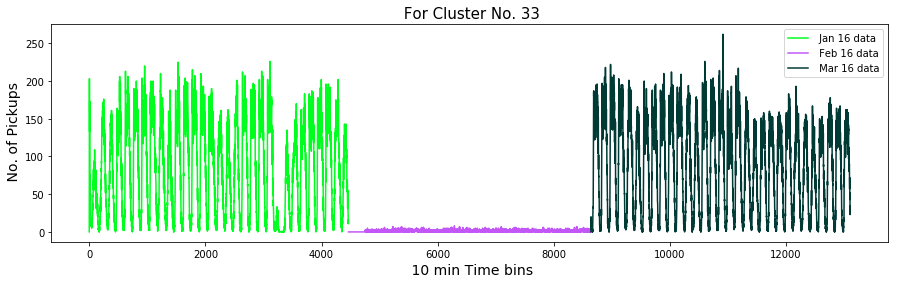

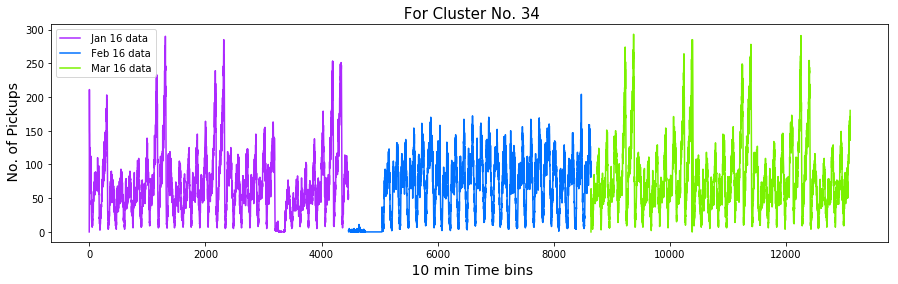

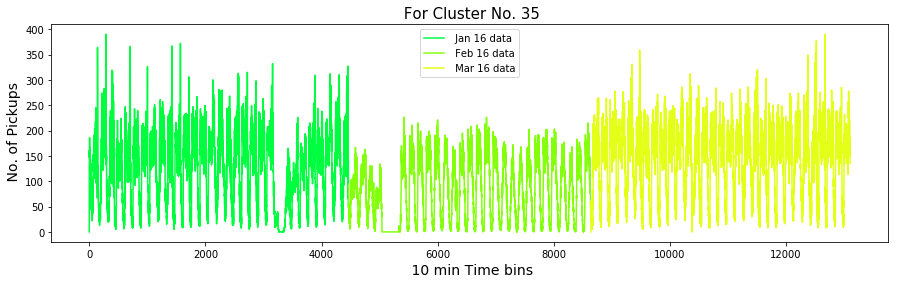

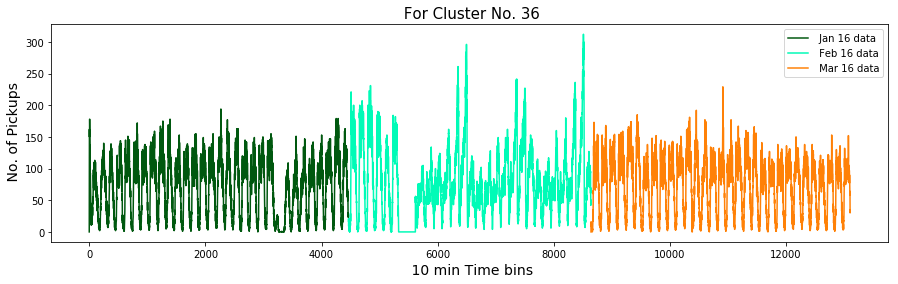

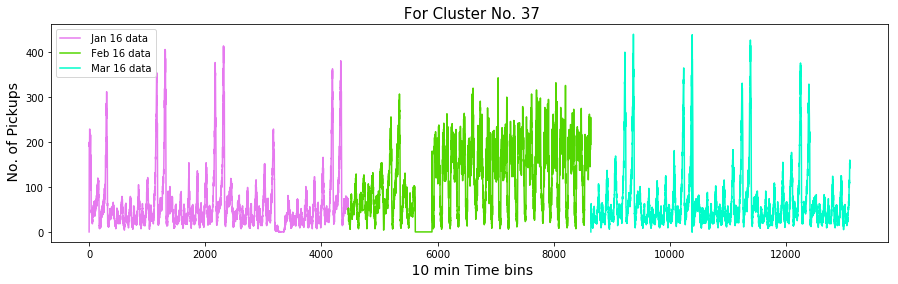

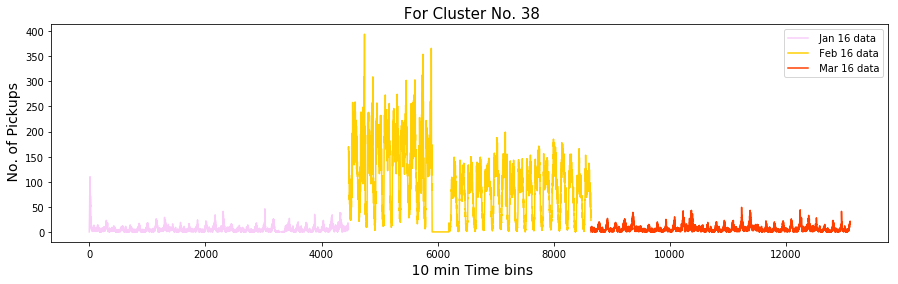

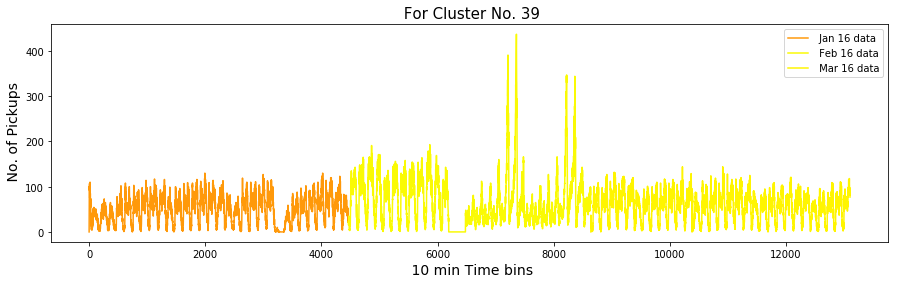

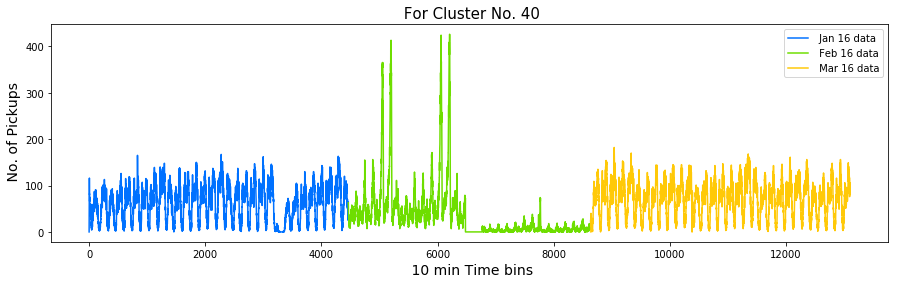

In [87]:
def uniq():  # to generate unique color in plots
    return plt.cm.gist_ncar(np.random.random())

jan = list( range(0,4464) )      # 0 - 4464
feb = list( range(4464,8640) )   # 4464  -  4464 + 4176
mar = list( range(8640,13104) )  # 4464 + 4176  -  4464 + 4176 + 4464

print('\n\n\t\t\t Plots of all values of pickup data of every bin region/cluster-wise :- ')

for i in range( 40 ):
    
    plt.figure( figsize=(15,4) )
    
    plt.plot( jan, combined[i][:4464], color=uniq(), label = ' Jan 16 data')
    plt.plot( feb, combined[i][4464:8640], color=uniq(), label = ' Feb 16 data')
    plt.plot( mar, combined[i][8640:], color=uniq(), label = ' Mar 16 data')
    
    plt.title(f' For Cluster No. {i+1}', size=(15) )
    plt.xlabel(" 10 min Time bins", size=(14))
    plt.ylabel(" No. of Pickups", size=(14))
    plt.legend()
    plt.show()

The Fourier transform (FT) decomposes (also called analysis) a function of time (a signal) into its constituent frequencies. This is similar to the way a musical chord can be expressed in terms of the volumes and frequencies (or pitches) of its constituent notes. The term Fourier transform refers to both the frequency domain representation and the mathematical operation that associates the frequency domain representation to a function of time.

A function derived from a given function and representing it by a series of sinusoidal functions.


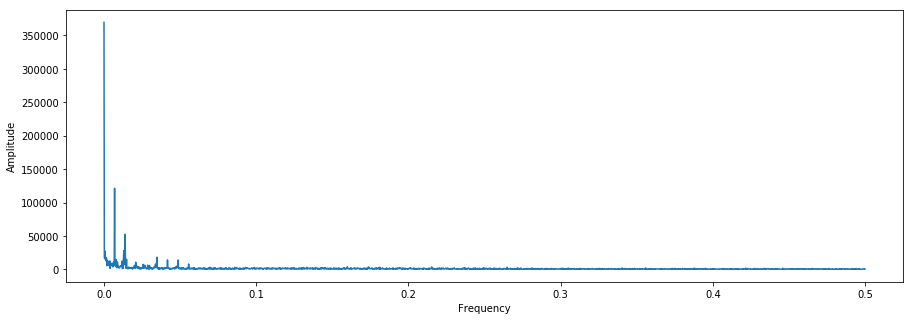

In [88]:
ft  = np.fft.fft( np.array(djan16)[0:4460] )

freq = np.fft.fftfreq( 4460, 1 )
n = len(freq)

plt.figure( figsize=(15,5) )

plt.plot( freq[:int(n/2)], np.abs(ft)[:int(n/2)] )

plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

# numpy.fft.fft(a, n=None, axis=-1, norm=None) : Compute the 1-D discrete Fourier Transform.
# This function computes the 1-D n-point discrete Fourier Transform (DFT).... 
# .... with efficient Fast Fourier Transform (FFT) algorithm [CT].

# numpy.fft.fftfreq(n, d=1.0) : Return the Discrete Fourier Transform sample frequencies.
# The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing (with 0 at the start)
# For instance, if the sample spacing is in seconds, then the frequency unit is cycles/second.
# Given a window length 'n' and a sample space 'd'

# np.abs() : Calculate the absolute value element-wise.

# Here, we are concern only about positive frequencies and amplitudes 
# np.fft.fftfreq(n, 1) : returns the frequency of sine in a symmetric form
# means there will be equal number of positive and negative sine wave frequencies. But we are concern only about positive ones.

# Ref : https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
# Ref : https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html  

### Preparing Data for Regression Models

In [93]:
# No. of 10 min indices for Jan 16 = 24 * 31 * 60 / 10 = 4464
# No. of 10 min indices for Feb 16 = 24 * 29 * 60 / 10 = 4176
# No. of 10 min indices for Mar 16 = 24 * 31 * 60 / 10 = 4464

# We take no. of pickups that happened in last five 10 min intervals
timeStamp = 5

# It is list of lists, it will contain number of pickups for each cluster
output = []


# lattitude of cluster center for every cluster, it is list of lists
lat = []


# logitude of cluster center for every cluster, it is list of lists
lon = []

# Wecode each day, Sun=0, Mon=1, Tue=2, Wed=3, Thu=4, Fri=5, Sat=6, it is list of lists
weekday = []

# each row corresponds to an entry in out data
# for the first row we will have [f0,f1,f2,f3,f4] fi=number of pickups happened in i+1th 10min intravel(bin)
# the second row will have [f1,f2,f3,f4,f5]
# the third row will have [f2,f3,f4,f5,f6] and so on...
feat = []

feat = [0] * timeStamp  # feat = [0] * 5 => [0, 0, 0, 0, 0]

for i in range( 0, 40 ):
    lat.append( [ kmeans.cluster_centers_[i][0]] * 13099 ) # 4464 + 4176 + 4464 = 13104
    lon.append( [ kmeans.cluster_centers_[i][1]] * 13099 ) # 13104 - 5 = 13099
    
    # Jan 1st 2016 is Fri, so we start our day from 5: "(int(k/144)) % 7+5"
    # Our prediction start from fifth 10 min interval ( 50th min )
    # Since we need to have no. of pickups that are happened in last 5 pickup bins
    
    w = [ int((( int(k/144) ) % 7 + 5 ) % 7 ) for k in range( 5, 13104 )]
    weekday.append( w )
    
    x = [ combined[i][r : r+timeStamp] for r in range( 0, len(combined[i]) - timeStamp ) ]
    feat = np.vstack(( feat, x))
    
    output.append(combined[i][5:])
    
feat = feat[1:]

# combined : It will contain 40 lists, each list will contain 4464 + 4176 + 4464 values which represents the number of pickups 
# len( combined[0] ) = 13104
# no. of pickups 13099 for each cluster

In [94]:
print( output[2][:29] )
print( len(output[9]) )
print( len(output) )
print()
print( lat[2][:5] )
print( len(lat[9]) )
print( len(lat) )
print()
print( feat[0] )
print( feat[1] )
print( feat[2] )
print( feat[3] )
print(feat.shape)
print()
print(weekday[2][:30])
print( len(weekday[9]) )
print( len(weekday) )

[114, 92, 103, 97, 104, 102, 119, 101, 106, 95, 69, 100, 79, 76, 84, 72, 86, 71, 74, 112, 101, 96, 78, 75, 72, 68, 48, 54, 94]
13099
40

[40.72978931505832, 40.72978931505832, 40.72978931505832, 40.72978931505832, 40.72978931505832]
13099
40

[  0  63 217 189 137]
[ 63 217 189 137 135]
[217 189 137 135 129]
[189 137 135 129 150]
(523960, 5)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
13099
40


We get the predictions of Exponential moving averages to be used as a feature in cumulative form

We computed 8 features for every data point that starts from 50th min (fifth 10 min interval)
of the day
1. lat : cluster center lattitude
2. lon : cluster center longitude
3. weekday : day of the week 
4. f1 : number of pickups that are happened previous t-1th 10 min interval
5. f2 : number of pickups that are happened previous t-2th 10 min interval
6. f3 : number of pickups that are happened previous t-3th 10 min interval
7. f4 : number of pickups that are happened previous t-4th 10 min interval
8. f5 : number of pickups that are happened previous t-5th 10 min interval

Here f1,f2...........f5 are part of 5 features of 'feat'

From the baseline models we observed that Exponential weighted moving avarage gives us the best error
we will try to add the same exponential weighted moving avarage at t as a feature to our data

Exponential weighted moving avarage => p'(t) = alpha x p'(t-1) + (1-alpha) x P(t-1) 

In [95]:
alpha = 0.3

predVals = []  # store exponential weighted moving average for each 10 min interval
predList = []
expAvg = []

for c in range( 0, 40 ):
    
    for i in range( 0, 13104 ):   # 4464 + 4176 + 4464 = 13104
        if i == 0:
            prVal= combined[c][0]
            predVals.append(0)
            continue
            
        predVals.append( prVal )
        prVal = int( (alpha * prVal) + (1 - alpha) * ( combined[c][i] ) )
    
    predList.append( predVals[5:] )
    predVals = []

# p'(t) = alpha * p'(t-1) + (1-alpha) * P(t-1)
# combined : It will contain 40 lists, each list will contain 4464 + 4176 + 4464 values which represents the number of pickups 

In [96]:
print(predList[2][10:30])
print( len(predList[2]) )
print( len(predList) )

[98, 77, 93, 83, 78, 82, 75, 82, 74, 74, 100, 100, 97, 83, 77, 73, 69, 54, 54, 82]
13099
40


### Train-Test Split

We take 3 months data of 2016 pickup and split it such that for every region we have 70% data in train and 30% in test, ordered date-wise for every region

In [97]:
print(" Size of train data should be : ", int(13099*0.7))
print(" Size of test data should be : ", int(13099*0.3))

 Size of train data should be :  9169
 Size of test data should be :  3929


In [98]:
# Taking 1st 9169 timestamp values  for our Train data
trFeat =  [ feat[ i * 13099 : (13099*i + 9169) ] for i in range(0,40) ]

teFeat = [ feat[ (13099*i) + 9169 : 13099 * (i+1) ] for i in range(0,40) ]

In [99]:
print('Train Features :-')
print( trFeat[0][0] )
print( trFeat[0][1] )
print('No. of Data clusters : ', len(trFeat))
print('No. of Data points in each clusters : ',  len(trFeat[0]) )
print('No. of features in each Data point : ', len(trFeat[0][0]) )

print('\n Test Features :-')
print( teFeat[0][0] )
print( teFeat[0][1] )
print('No. of Data clusters : ', len(teFeat))
print('No. of Data points in each clusters : ',  len(teFeat[0]) )
print('No. of features in each Data point : ', len(teFeat[0][0]) )

Train Features :-
[  0  63 217 189 137]
[ 63 217 189 137 135]
No. of Data clusters :  40
No. of Data points in each clusters :  9169
No. of features in each Data point :  5

 Test Features :-
[118 106 104  93 102]
[106 104  93 102 101]
No. of Data clusters :  40
No. of Data points in each clusters :  3930
No. of features in each Data point :  5


In [100]:
# Taking 1st 9169 timestamp values  for our Train data

trLat = [ i[:9169] for i in lat ]
trLon = [ i[:9169] for i in lon ]
trWeekday = [ i[:9169] for i in weekday ]
trOutput = [ i[:9169] for i in output ]
trExpAvg = [ i[:9169] for i in predList ]

In [101]:
# Taking the rest of the timestamp values  for our Test data

teLat = [ i[9169:] for i in lat ]
teLon = [ i[9169:] for i in lon ]
teWeekday = [ i[9169:] for i in weekday ]
teOutput = [ i[9169:] for i in output ]
teExpAvg = [ i[9169:] for i in predList ]

In [102]:
print( len(trLat) )
print( len(teLat) )

40
40


All the above list are in the form of list of lists, We convert them to a single list

In [103]:
# We had values in the form of list of lists, here we make all of them in one list

trainFeat = []
for i in range(0,40):
    trainFeat.extend( trFeat[i] )
    
testFeat = []
for i in range(0,40):
    testFeat.extend( teFeat[i] )

In [104]:


print('Train Features :-')
print( trainFeat[0][0] )
print( trainFeat[0] )
print('No. of Data points : ', len(trainFeat))
print('No. of features in each Data point : ', len(trainFeat[0]) )

print('\n Test Features :-')
print( testFeat[0][0] )
print( testFeat[0] )
print('No. of Data points : ', len(testFeat))
print('No. of features in each Data point : ', len(testFeat[0]) )

trainFeat[0:3]

Train Features :-
0
[  0  63 217 189 137]
No. of Data points :  366760
No. of features in each Data point :  5

 Test Features :-
118
[118 106 104  93 102]
No. of Data points :  157200
No. of features in each Data point :  5


[array([  0,  63, 217, 189, 137], dtype=int64),
 array([ 63, 217, 189, 137, 135], dtype=int64),
 array([217, 189, 137, 135, 129], dtype=int64)]

In [105]:
# Converting lists of lists into sinle list i.e flatten

a  = [ [1,2,3,4], [4,6,7,8] ]
sum( a, [] )

[1, 2, 3, 4, 4, 6, 7, 8]

In [106]:
# Converting lists of lists into sinle list i.e flatten

# For Train
trainLat = sum( trLat, [] )
trainLon = sum( trLon, [] )
trainWeekday = sum( trWeekday, [] )
trainOutput = sum( trOutput, [] )
trainExpAvg = sum( trExpAvg, [] )

# For Test
testLat = sum( teLat, [] )
testLon = sum( teLon, [] )
testWeekday = sum( teWeekday, [] )
testOutput = sum( teOutput, [] )
testExpAvg = sum( teExpAvg, [] )

In [107]:
print( len(trainLat) )
print( len(testLat) )

366760
157200


In [108]:
# Preparing the data frame for our Train data
import pandas as pd

cols = ['f5','f4','f3','f2','f1']

train = pd.DataFrame( data = trainFeat, columns = cols ) 

train['lat'] = trainLat
train['lon'] = trainLon
train['weekday'] = trainWeekday
train['expAvg'] = trainExpAvg

print(train.shape)
train.head()

NameError: name 'pd' is not defined

In [109]:
cols = ['f5','f4','f3','f2','f1']

test = pd.DataFrame( data = testFeat, columns = cols ) 

test['lat'] = testLat
test['lon'] = testLon
test['weekday'] = testWeekday
test['expAvg'] = testExpAvg

print(test.shape)
test.head()

NameError: name 'pd' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression( n_jobs = -1 )
lr.fit( train, trainOutput )

ypred = lr.predict( test )
tePred = [ round(value) for value in ypred]

ypred = lr.predict( train )
trPred = [round(value) for value in ypred]

In [157]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(' MAPE Train : ', mean_absolute_error( trainOutput, trPred) / ( sum(trainOutput) / len(trainOutput) ) )
print(' MAPE Test : ', mean_absolute_error( testOutput, tePred) / ( sum(testOutput) / len(testOutput) ) )


 MAPE Train :  0.13329944069156602
 MAPE Test :  0.129092297458991


In [154]:
from sklearn.ensemble import RandomForestRegressor

depth = [ 5, 11, 51, 101 ]
estimator = [10, 50, 100, 200]

for i in depth:
    for j in estimator:

        rf = RandomForestRegressor( max_depth=i, n_estimators=j, max_features='sqrt', min_samples_leaf=4,\
                                   min_samples_split=3, n_jobs=-1 )
        rf.fit( train, trainOutput )

        ypred = rf.predict(train)
        trPred = [round(value) for value in ypred]
    
        matr = mean_absolute_error( trainOutput, trPred) / ( sum(trainOutput) / len(trainOutput) ) 

        print('For max_depth = ',i,' and n_estimators = ',j,' MAPE Train : ',matr )

For max_depth =  5  and n_estimators =  10  MAPE Train :  0.13571887140430558
For max_depth =  5  and n_estimators =  50  MAPE Train :  0.13397550441180262
For max_depth =  5  and n_estimators =  100  MAPE Train :  0.13373911942622813
For max_depth =  5  and n_estimators =  200  MAPE Train :  0.1337105970870042
For max_depth =  11  and n_estimators =  10  MAPE Train :  0.12734399400489704
For max_depth =  11  and n_estimators =  50  MAPE Train :  0.1269457014949565
For max_depth =  11  and n_estimators =  100  MAPE Train :  0.1269173122304101
For max_depth =  11  and n_estimators =  200  MAPE Train :  0.1268743734677837
For max_depth =  51  and n_estimators =  10  MAPE Train :  0.0945817624791777
For max_depth =  51  and n_estimators =  50  MAPE Train :  0.09163189610167935
For max_depth =  51  and n_estimators =  100  MAPE Train :  0.09122890161979828
For max_depth =  51  and n_estimators =  200  MAPE Train :  0.0910384273979824
For max_depth =  101  and n_estimators =  10  MAPE Train

In [158]:
rf = RandomForestRegressor( max_depth=51, n_estimators=200, max_features='sqrt', min_samples_leaf=4,\
                                   min_samples_split=3, n_jobs=-1 )
rf.fit( train, trainOutput )

ypred = rf.predict(test)
tePred = [round(value) for value in ypred]

mean_absolute_error( testOutput, tePred) / ( sum(testOutput) / len(testOutput) ) 

0.12658846511130054

### Adding Fourier Transform Features

The Fourier transform (FT) decomposes (also called analysis) a function of time (a signal) into its constituent frequencies. This is similar to the way a musical chord can be expressed in terms of the volumes and frequencies (or pitches) of its constituent notes. The term Fourier transform refers to both the frequency domain representation and the mathematical operation that associates the frequency domain representation to a function of time.

A function derived from a given function and representing it by a series of sinusoidal functions.

Fourier Transform says that whenever we have a repeating pattern in a wave this repeating wave can be decomposed into sum of multiple sine waves. Each sine wave will have some frequency and amplitude. Now we can represent our original wave from time-domain to frequency-domain, where frequency will be presented on x-axis and amplitude will presented on y-axis. In frequency domain the x-axis frequencies will be discrete frequencies of individual sine waves and y-axis amplitudes will be their corresponding amplitude values.


In [110]:
# We choose Top 5 Frequency and Amplitude as features

amplitude = []
frequency = []

for i in range( 40 ):
    ampli  = np.abs( np.fft.fft( combined[i][0:13104] ))  # 4464 + 4176 + 4464 = 13104
    freq = np.abs( np.fft.fftfreq(13104, 1))

    ind = np.argsort( -ampli )[1:]  # returns array of indices for which corresponding amplitude values are sorted in reverse
    ampVal = []
    freqVal = []
    
    
    # Top 5 Amplitude : 366274.780935  366274.780935   187964.6817  187964.6817   82956.377856
    # Since 1st and 2nd Top Amplitude is similar we consider Top Amplitude at a gap of two so that our features are diverse
    # We do the same for Top Frequency
    
    for j in range(0,9,2):   # Taking top 5 amplitudes and frequencies
        ampVal.append( ampli[ ind[j]] )
        freqVal.append( freq[ ind[j]] )

    for k in range(13099):  # 13104 - 5 = 13099 ( No. of pickups in last five 10 mins interval)
        amplitude.append( ampVal ) 
        frequency.append( freqVal ) 
        
# numpy.fft.fft(a, n=None, axis=-1, norm=None) : Compute the 1-D discrete Fourier Transform.
# This function computes the 1-D n-point discrete Fourier Transform (DFT).... 
# .... with efficient Fast Fourier Transform (FFT) algorithm [CT].

# numpy.fft.fftfreq(n, d=1.0) : Return the Discrete Fourier Transform sample frequencies.
# The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing (with 0 at the start)
# For instance, if the sample spacing is in seconds, then the frequency unit is cycles/second.
# Given a window length 'n' and a sample space 'd'

# np.abs() : Calculate the absolute value element-wise.
        
# np.argsort(-ampli)[1:] : Returns array of indices for which corresponding amplitude values are sorted in reverse.

# Ref : https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
# Ref : https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html 

In [111]:
print('Amplitude :-')
print( amplitude[0] )
print('No. of Data points : ', len(amplitude))
print('No. of features in each Data point : ', len(amplitude[0]) )

print('\nFrequency :-')
print( frequency[0] )
print('No. of Data points : ', len(frequency))
print('No. of features in each Data point : ', len(frequency[0]) )

Amplitude :-
[366274.7809351938, 187964.68169988575, 82956.37785624314, 68159.01979798189, 62368.95661108733]
No. of Data points :  523960
No. of features in each Data point :  5

Frequency :-
[0.006944444444444444, 0.013888888888888888, 0.012896825396825396, 0.034722222222222224, 0.007936507936507936]
No. of Data points :  523960
No. of features in each Data point :  5


In [112]:
# Train Test Split of Fourier Features : Amplitude

trAmp =  [ amplitude[ i * 13099 : (13099*i + 9169) ] for i in range(0,40) ]

teAmp = [ amplitude[ (13099*i) + 9169 : 13099 * (i+1) ] for i in range(0,40) ]

print( len(trAmp) )
print( len(teAmp) )

40
40


In [113]:

# Train Test Split of Fourier Features : Frequency

trFreq =  [ frequency[ i * 13099 : (13099*i + 9169) ] for i in range(0,40) ]

teFreq = [ frequency[ (13099*i) + 9169 : 13099 * (i+1) ] for i in range(0,40) ]

print( len(trFreq) )
print( len(teFreq) )

40
40


In [114]:
# We had values in the form of list of lists, here we make all of them in one list

tram = []
for i in range(0,40):
    tram.extend( trAmp[i] )
    
team = []
for i in range(0,40):
    team.extend( teAmp[i] )
    
print( len(tram) )
print( len(team) )

366760
157200


In [115]:

# We had values in the form of list of lists, here we make all of them in one list

trfr = []
for i in range(0,40):
    trfr.extend( trFreq[i] )
    
tefr = []
for i in range(0,40):
    tefr.extend( teFreq[i] )
    
print( len(trfr) )
print( len(tefr) )

366760
157200


In [116]:
# Stacking Train features, Frequency, Amplitude to add directly

trFeatFreqAmp = np.hstack(( trainFeat, trfr, tram ))
trFeatFreqAmp.shape

(366760, 15)

In [117]:
import pandas as pd

cols = ['f5','f4','f3','f2','f1','fr5','fr4','fr3','fr2','fr1','am5','am4','am3','am2','am1']

trainFT = pd.DataFrame( data = trFeatFreqAmp, columns = cols ) 
trainFT['lat'] = trainLat
trainFT['lon'] = trainLon
trainFT['weekday'] = trainWeekday
trainFT['expAvg'] = trainExpAvg

print( trainFT.shape )
trainFT.head()

(366760, 19)


,f5,f4,f3,f2,f1,fr5,fr4,fr3,fr2,fr1,am5,am4,am3,am2,am1,lat,lon,weekday,expAvg
0,0.0,63.0,217.0,189.0,137.0,0.006944,0.013889,0.012897,0.034722,0.007937,366274.780935,187964.6817,82956.377856,68159.019798,62368.956611,40.776228,-73.982119,5,150
1,63.0,217.0,189.0,137.0,135.0,0.006944,0.013889,0.012897,0.034722,0.007937,366274.780935,187964.6817,82956.377856,68159.019798,62368.956611,40.776228,-73.982119,5,139
2,217.0,189.0,137.0,135.0,129.0,0.006944,0.013889,0.012897,0.034722,0.007937,366274.780935,187964.6817,82956.377856,68159.019798,62368.956611,40.776228,-73.982119,5,132
3,189.0,137.0,135.0,129.0,150.0,0.006944,0.013889,0.012897,0.034722,0.007937,366274.780935,187964.6817,82956.377856,68159.019798,62368.956611,40.776228,-73.982119,5,144
4,137.0,135.0,129.0,150.0,164.0,0.006944,0.013889,0.012897,0.034722,0.007937,366274.780935,187964.6817,82956.377856,68159.019798,62368.956611,40.776228,-73.982119,5,158


In [118]:
# Stacking Test features, Frequency, Amplitude to add directly

teFeatFreqAmp = np.hstack(( testFeat, tefr, team ))
teFeatFreqAmp.shape

(157200, 15)

In [119]:

cols = ['f5','f4','f3','f2','f1','fr5','fr4','fr3','fr2','fr1','am5','am4','am3','am2','am1']

testFT = pd.DataFrame( data = teFeatFreqAmp, columns = cols ) 
testFT['lat'] = testLat
testFT['lon'] = testLon
testFT['weekday'] = testWeekday
testFT['expAvg'] = testExpAvg

print( testFT.shape )
testFT.head()

(157200, 19)


,f5,f4,f3,f2,f1,fr5,fr4,fr3,fr2,fr1,am5,am4,am3,am2,am1,lat,lon,weekday,expAvg
0,118.0,106.0,104.0,93.0,102.0,0.006944,0.013889,0.012897,0.034722,0.007937,366274.780935,187964.6817,82956.377856,68159.019798,62368.956611,40.776228,-73.982119,5,100
1,106.0,104.0,93.0,102.0,101.0,0.006944,0.013889,0.012897,0.034722,0.007937,366274.780935,187964.6817,82956.377856,68159.019798,62368.956611,40.776228,-73.982119,5,100
2,104.0,93.0,102.0,101.0,120.0,0.006944,0.013889,0.012897,0.034722,0.007937,366274.780935,187964.6817,82956.377856,68159.019798,62368.956611,40.776228,-73.982119,5,114
3,93.0,102.0,101.0,120.0,131.0,0.006944,0.013889,0.012897,0.034722,0.007937,366274.780935,187964.6817,82956.377856,68159.019798,62368.956611,40.776228,-73.982119,5,125
4,102.0,101.0,120.0,131.0,164.0,0.006944,0.013889,0.012897,0.034722,0.007937,366274.780935,187964.6817,82956.377856,68159.019798,62368.956611,40.776228,-73.982119,5,152


trainFT.to_csv('trainFT.csv', encoding='utf-8', index=None)
testFT.to_csv('testFT.csv', encoding='utf-8', index=None)

df = pd.read_csv('trainFT.csv')
print(df.shape)
print(df.head())
df = pd.read_csv('testFT.csv')
print(df.shape)
print(df.head())

In [3]:
trainFT = dd.read_csv('trainFT.csv')
testFT = dd.read_csv('testFT.csv')
testFT.head(2)

D:\Anaconda\lib\site-packages\distributed\utils.py:118: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  % (host, default, e), RuntimeWarning)


,f5,f4,f3,f2,f1,fr5,fr4,fr3,fr2,fr1,am5,am4,am3,am2,am1,lat,lon,weekday,expAvg
0,118.0,106.0,104.0,93.0,102.0,0.006944,0.013889,0.012897,0.034722,0.007937,366274.780935,187964.6817,82956.377856,68159.019798,62368.956611,40.776228,-73.982119,5,100
1,106.0,104.0,93.0,102.0,101.0,0.006944,0.013889,0.012897,0.034722,0.007937,366274.780935,187964.6817,82956.377856,68159.019798,62368.956611,40.776228,-73.982119,5,100


In [4]:
trainOutput = dd.read_csv('trainOutput.csv')
testOutput = dd.read_csv('testOutput.csv')
trainOutput.head(2)

,label
0,135
1,129


In [5]:
import numpy as np

trainOutput = np.array( trainOutput ).reshape((366760))
print(trainOutput.shape)

testOutput = np.array( testOutput ).reshape((157200))
print(testOutput.shape)

(366760,)
(157200,)


In [6]:
from sklearn.metrics import mean_absolute_error


In [10]:
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor

depth = [ 11, 51, 101, 151 ]
estimator = [ 100, 200, 400, 600, 800 ]

for i in depth:
    for j in estimator:

        rf = RandomForestRegressor( max_depth=i, n_estimators=j, max_features='sqrt', min_samples_leaf=4,\
                                   min_samples_split=3, n_jobs=-1 )
        
        rf.fit( trainFT, trainOutput )

        ypred = rf.predict(trainFT)
        trPred = [round(value) for value in ypred]
    
        matr = mean_absolute_error( trainOutput, trPred) / ( sum(trainOutput) / len(trainOutput) ) 

        print('For max_depth = ',i,' and n_estimators = ',j,' MAPE Train : ',matr )

For max_depth =  11  and n_estimators =  100  MAPE Train :  0.12654692104453152
For max_depth =  11  and n_estimators =  200  MAPE Train :  0.12645545438282116
For max_depth =  11  and n_estimators =  400  MAPE Train :  0.12643358577747527
For max_depth =  11  and n_estimators =  600  MAPE Train :  0.12642227442988258
For max_depth =  11  and n_estimators =  800  MAPE Train :  0.12643531574828357
For max_depth =  51  and n_estimators =  100  MAPE Train :  0.09529659528881042
For max_depth =  51  and n_estimators =  200  MAPE Train :  0.09509778172053404
For max_depth =  51  and n_estimators =  400  MAPE Train :  0.0950364786524042
For max_depth =  51  and n_estimators =  600  MAPE Train :  0.0950335953677237
For max_depth =  51  and n_estimators =  800  MAPE Train :  0.09500343177414317
For max_depth =  101  and n_estimators =  100  MAPE Train :  0.0952771663858865
For max_depth =  101  and n_estimators =  200  MAPE Train :  0.09509933425843892
For max_depth =  101  and n_estimators = 

In [13]:
rf = RandomForestRegressor( max_depth=101, n_estimators=800, max_features='sqrt', min_samples_leaf=4,\
                                   min_samples_split=3, n_jobs=-1 )
rf.fit( trainFT, trainOutput )

ypred = rf.predict(testFT)
tePred = [round(value) for value in ypred]

mean_absolute_error( testOutput, tePred) / ( sum(testOutput) / len(testOutput) ) 

0.12516696038441982

In [8]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

depth = [ 11, 51, 101, 151 ]
estimator = [ 50, 100, 200, 400, 600 ]

for i in depth:
    for j in estimator:
        
        xg = xgb.XGBRegressor( max_depth = i, n_estimators = j, min_child_weight=3, gamma=0, subsample=0.8,\
                              reg_alpha=200, reg_lambda=200, colsample_bytree=0.8, nthread=4 )
        xg.fit( trainFT, trainOutput )

        ypred = xg.predict(trainFT)
        trPred = [round(value) for value in ypred]
    
        matr = mean_absolute_error( trainOutput, trPred) / ( sum(trainOutput) / len(trainOutput) ) 
        
        ypred = xg.predict(testFT)
        tePred = [round(value) for value in ypred]

        mate = mean_absolute_error( testOutput, tePred) / ( sum(testOutput) / len(testOutput) ) 

        print('For max_depth = ',i,' and n_estimators = ',j,' MAPE Train : ',matr, ' and MAPE Test : ',mate )

For max_depth =  11  and n_estimators =  50  MAPE Train :  0.12797175161717894  and MAPE Test :  0.1257501271077912
For max_depth =  11  and n_estimators =  100  MAPE Train :  0.12589179440689793  and MAPE Test :  0.12491838341826299
For max_depth =  11  and n_estimators =  200  MAPE Train :  0.12378366972319979  and MAPE Test :  0.124734602754703
For max_depth =  11  and n_estimators =  400  MAPE Train :  0.11944308424873556  and MAPE Test :  0.12468939825451375
For max_depth =  11  and n_estimators =  600  MAPE Train :  0.11532477784402433  and MAPE Test :  0.12491780999965595
For max_depth =  51  and n_estimators =  50  MAPE Train :  0.12660529646975505  and MAPE Test :  0.12554178501389585
For max_depth =  51  and n_estimators =  100  MAPE Train :  0.11927030895903531  and MAPE Test :  0.12436188066011951
For max_depth =  51  and n_estimators =  200  MAPE Train :  0.10921713808445123  and MAPE Test :  0.12476556735948377
For max_depth =  51  and n_estimators =  400  MAPE Train :  0

In [7]:
# Taking only Top 2 Frequencies/ Amplitude

xtr = trainFT[['f5','f4','f3','f2','f1','fr5','fr4','am5','am4','lat','lon','weekday','expAvg']]
xte = testFT[['f5','f4','f3','f2','f1','fr5','fr4','am5','am4','lat','lon','weekday','expAvg']]
type(xte)

dask.dataframe.core.DataFrame

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

depth = [ 11, 51, 101, 151, 201 ]
estimator = [ 100, 200, 400, 600, 800 ]

for i in depth:
    for j in estimator:

        rf = RandomForestRegressor( max_depth=i, n_estimators=j, max_features='sqrt', min_samples_leaf=4,\
                                   min_samples_split=3, n_jobs=-1 )
        rf.fit( xtr, trainOutput )

        ypred = rf.predict(xtr)
        trPred = [round(value) for value in ypred]
    
        matr = mean_absolute_error( trainOutput, trPred) / ( sum(trainOutput) / len(trainOutput) ) 

        ypred = rf.predict(xte)
        tePred = [round(value) for value in ypred]

        mate = mean_absolute_error( testOutput, tePred) / ( sum(testOutput) / len(testOutput) ) 

        print('For max_depth = ',i,' and n_estimators = ',j,' MAPE Train : ',matr, ' and MAPE Test : ',mate )

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


For max_depth =  11  and n_estimators =  100  MAPE Train :  0.12657637490649842  and MAPE Test :  0.12621258921437828
For max_depth =  11  and n_estimators =  200  MAPE Train :  0.1265221247962793  and MAPE Test :  0.1261778018188838
For max_depth =  11  and n_estimators =  400  MAPE Train :  0.12645767229411384  and MAPE Test :  0.12615773216763704
For max_depth =  11  and n_estimators =  600  MAPE Train :  0.12649142890398854  and MAPE Test :  0.12614626379549598
For max_depth =  11  and n_estimators =  800  MAPE Train :  0.12647741170461876  and MAPE Test :  0.12610803588835923
For max_depth =  51  and n_estimators =  100  MAPE Train :  0.09419460388392642  and MAPE Test :  0.12556328821166027
For max_depth =  51  and n_estimators =  200  MAPE Train :  0.09404152364650521  and MAPE Test :  0.1254123835482379
For max_depth =  51  and n_estimators =  400  MAPE Train :  0.09396127961593584  and MAPE Test :  0.12532952455951893
For max_depth =  51  and n_estimators =  600  MAPE Train : 

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor( max_depth=151, n_estimators=600, max_features='sqrt', min_samples_leaf=4,\
                                   min_samples_split=3, n_jobs=-1  )
rf.fit( xtr, trainOutput )

ypred = rf.predict(xte)
tePred = [round(value) for value in ypred]

mean_absolute_error( testOutput, tePred) / ( sum(testOutput) / len(testOutput) ) 

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.12528919411748965

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

depth = [ 11, 51, 101, 151 ]
estimator = [ 100, 200, 400, 600, 800 ]

for i in depth:
    for j in estimator:
        
        xg = xgb.XGBRegressor( max_depth = i, n_estimators = j, min_child_weight=3, gamma=0, subsample=0.8,\
                              reg_alpha=200, reg_lambda=200, colsample_bytree=0.8, nthread=4 )
        xg.fit( xtr, trainOutput )

        ypred = xg.predict(xtr)
        trPred = [round(value) for value in ypred]
    
        matr = mean_absolute_error( trainOutput, trPred) / ( sum(trainOutput) / len(trainOutput) ) 

        ypred = xg.predict(testFT)
        tePred = [round(value) for value in ypred]

        mate = mean_absolute_error( testOutput, tePred) / ( sum(testOutput) / len(testOutput) ) 

        print('For max_depth = ',i,' and n_estimators = ',j,' MAPE Train : ',matr, ' and MAPE Test : ',mate )

## Taking only Jan 16 data

In [113]:
combinedJan16 = []
for i in range(40):
    combinedJan16.append( djan16[ 4464*i : ((4464*i) + 4464) ] )


In [114]:
# No. of 10 min indices for Jan 16 = 24 * 31 * 60 / 10 = 4464
# No. of 10 min indices for Feb 16 = 24 * 29 * 60 / 10 = 4176
# No. of 10 min indices for Mar 16 = 24 * 31 * 60 / 10 = 4464

# We take no. of pickups that happened in last five 10 min intervals
timeStamp = 5

# It is list of lists, it will contain number of pickups for each cluster
outputJan16 = []


# lattitude of cluster center for every cluster, it is list of lists
latJan16 = []


# logitude of cluster center for every cluster, it is list of lists
lonJan16 = []

# Wecode each day, Sun=0, Mon=1, Tue=2, Wed=3, Thu=4, Fri=5, Sat=6, it is list of lists
weekdayJan16 = []

# each row corresponds to an entry in out data
# for the first row we will have [f0,f1,f2,f3,f4] fi=number of pickups happened in i+1th 10min intravel(bin)
# the second row will have [f1,f2,f3,f4,f5]
# the third row will have [f2,f3,f4,f5,f6] and so on...
featJan16 = []

featJan16 = [0] * timeStamp  # feat = [0] * 5 => [0, 0, 0, 0, 0]

for i in range( 0, 40 ):
    latJan16.append( [ kmeans.cluster_centers_[i][0]] * 4459 ) # 4464 
    lonJan16.append( [ kmeans.cluster_centers_[i][1]] * 4459 ) # 4464 - 5 = 4459
    
    # Jan 1st 2016 is Fri, so we start our day from 5: "(int(k/144)) % 7+5"
    # Our prediction start from fifth 10 min interval ( 50th min )
    # Since we need to have no. of pickups that are happened in last 5 pickup bins
    
    w = [ int((( int(k/144) ) % 7 + 5 ) % 7 ) for k in range( 5, 4464 )]
    weekdayJan16.append( w )
    
    x = [ combinedJan16[i][r : r+timeStamp] for r in range( 0, len(combinedJan16[i]) - timeStamp ) ]
    featJan16 = np.vstack(( featJan16, x))
    
    outputJan16.append(combinedJan16[i][5:])
    
featJan16 = featJan16[1:]

# combined : It will contain 40 lists, each list will contain 4464 + 4176 + 4464 values which represents the number of pickups 
# len( combined[0] ) = 13104
# no. of pickups 13099 for each cluster

In [115]:
alpha = 0.3

predVals = []  # store exponential weighted moving average for each 10 min interval
predList = []
expAvg = []

for c in range( 0, 40 ):
    
    for i in range( 0, 4464 ):   # 4464 + 4176 + 4464 = 13104
        if i == 0:
            prVal= combinedJan16[c][0]
            predVals.append(0)
            continue
            
        predVals.append( prVal )
        prVal = int( (alpha * prVal) + (1 - alpha) * ( combinedJan16[c][i] ) )
    
    predList.append( predVals[5:] )
    predVals = []

# p'(t) = alpha * p'(t-1) + (1-alpha) * P(t-1)
# combined : It will contain 40 lists, each list will contain 4464 + 4176 + 4464 values which represents the number of pickups 

In [116]:
len(predList)

40

In [118]:
amplitude = []
frequency = []

for i in range( 40 ):
    ampli  = np.abs( np.fft.fft( combinedJan16[i][0:4096] ))  # 4464 + 4176 + 4464 = 13104
    freq = np.abs( np.fft.fftfreq(4096, 1))

    ind = np.argsort( -ampli )[1:]  # returns array of indices for which corresponding amplitude values are sorted in reverse
    ampVal = []
    freqVal = []
    
    
    # Top 5 Amplitude : 366274.780935  366274.780935   187964.6817  187964.6817   82956.377856
    # Since 1st and 2nd Top Amplitude is similar we consider Top Amplitude at a gap of two so that our features are diverse
    # We do the same for Top Frequency
    
    for j in range(0,9,2):   # Taking top 5 amplitudes and frequencies
        ampVal.append( ampli[ ind[j]] )
        freqVal.append( freq[ ind[j]] )

    for k in range(4459):  # 13104 - 5 = 13099 ( No. of pickups in last five 10 mins interval)
        amplitude.append( ampVal ) 
        frequency.append( freqVal ) 
        

In [119]:
print("Size of train data for one cluster:", int(4459*0.7))
print("Size of  test data for one cluster:", int(4459*0.3))

Size of train data for one cluster: 3121
Size of  test data for one cluster: 1337


In [120]:
# Taking 1st 9169 timestamp values  for our Train data
trFeatJan16 =  [ featJan16[ i * 4459 : (4459*i + 3121) ] for i in range(0,40) ]

teFeatJan16 = [ featJan16[ (4459*i) + 3121 : 4459 * (i+1) ] for i in range(0,40) ]

In [121]:
# We had values in the form of list of lists, here we make all of them in one list

trainFeatJan16 = []
for i in range(0,40):
    trainFeatJan16.extend( trFeatJan16[i] )
    
testFeatJan16 = []
for i in range(0,40):
    testFeatJan16.extend( teFeatJan16[i] )

print('Train Features :-')
print( trainFeatJan16[0][0] )
print( trainFeatJan16[0] )
print('No. of Data points : ', len(trainFeatJan16))
print('No. of features in each Data point : ', len(trainFeatJan16[0]) )

print('\n Test Features :-')
print( testFeatJan16[0][0] )
print( testFeatJan16[0] )
print('No. of Data points : ', len(testFeatJan16))
print('No. of features in each Data point : ', len(testFeatJan16[0]) )

trainFeatJan16[0:3]

Train Features :-
0
[  0  63 217 189 137]
No. of Data points :  124840
No. of features in each Data point :  5

 Test Features :-
119
[119 121 126 115 104]
No. of Data points :  53520
No. of features in each Data point :  5


[array([  0,  63, 217, 189, 137], dtype=int64),
 array([ 63, 217, 189, 137, 135], dtype=int64),
 array([217, 189, 137, 135, 129], dtype=int64)]

In [122]:
len(outputJan16)

40

In [123]:
# Taking 1st 9169 timestamp values  for our Train data

trLat = [ i[:3121] for i in latJan16 ]
trLon = [ i[:3121] for i in lonJan16 ]
trWeekday = [ i[:3121] for i in weekdayJan16 ]
trOutput = [ i[:3121] for i in outputJan16 ]
trExpAvg = [ i[:3121] for i in predList ]

In [124]:
# Taking the rest of the timestamp values  for our Test data

teLat = [ i[3121:] for i in latJan16 ]
teLon = [ i[3121:] for i in lonJan16 ]
teWeekday = [ i[3121:] for i in weekdayJan16 ]
teOutput = [ i[3121:] for i in outputJan16 ]
teExpAvg = [ i[3121:] for i in predList ]

In [125]:
# Converting lists of lists into sinle list i.e flatten

# For Train
trainLat = sum( trLat, [] )
trainLon = sum( trLon, [] )
trainWeekday = sum( trWeekday, [] )
trainOutput = sum( trOutput, [] )
trainExpAvg = sum( trExpAvg, [] )

# For Test
testLat = sum( teLat, [] )
testLon = sum( teLon, [] )
testWeekday = sum( teWeekday, [] )
testOutput = sum( teOutput, [] )
testExpAvg = sum( teExpAvg, [] )

In [126]:
print( len( trainLat ) )
print( len( testLat ) )

124840
53520


In [127]:
# Train Test Split of Fourier Features : Amplitude

trAmp =  [ amplitude[ i * 4459 : (4459*i + 3121) ] for i in range(0,40) ]

teAmp = [ amplitude[ (4459*i) + 3121 : 4459 * (i+1) ] for i in range(0,40) ]

print( len(trAmp) )
print( len(teAmp) )
# Train Test Split of Fourier Features : Frequency

trFreq =  [ frequency[ i * 4459 : (4459*i + 3121) ] for i in range(0,40) ]

teFreq = [ frequency[ (4459*i) + 3121 : 4459 * (i+1) ] for i in range(0,40) ]

print( len(trFreq) )
print( len(teFreq) )

40
40
40
40


In [128]:
# We had values in the form of list of lists, here we make all of them in one list

tram = []
for i in range(0,40):
    tram.extend( trAmp[i] )
    
team = []
for i in range(0,40):
    team.extend( teAmp[i] )
    
print( len(tram) )
print( len(team) )
# We had values in the form of list of lists, here we make all of them in one list

trfr = []
for i in range(0,40):
    trfr.extend( trFreq[i] )
    
tefr = []
for i in range(0,40):
    tefr.extend( teFreq[i] )
    
print( len(trfr) )
print( len(tefr) )

124840
53520
124840
53520


In [129]:
trFeatFreqAmp = np.hstack(( trainFeatJan16, trfr, tram ))
trFeatFreqAmp.shape

(124840, 15)

In [104]:
import pandas as pd
cols = ['f5','f4','f3','f2','f1','fr5','fr4','fr3','fr2','fr1','am5','am4','am3','am2','am1']

trainFTJan16 = pd.DataFrame( data = trFeatFreqAmp, columns = cols ) 
trainFTJan16['lat'] = trainLat
trainFTJan16['lon'] = trainLon
trainFTJan16['weekday'] = trainWeekday
trainFTJan16['expAvg'] = trainExpAvg

print( trainFTJan16.shape )
trainFTJan16.head()

(124840, 19)


,f5,f4,f3,f2,f1,fr5,fr4,fr3,fr2,fr1,am5,am4,am3,am2,am1,lat,lon,weekday,expAvg
0,0.0,63.0,217.0,189.0,137.0,0.006836,0.00708,0.013916,0.012939,0.007812,79801.690695,65993.385455,50148.386133,29018.427417,24693.247765,40.776228,-73.982119,5,150
1,63.0,217.0,189.0,137.0,135.0,0.006836,0.00708,0.013916,0.012939,0.007812,79801.690695,65993.385455,50148.386133,29018.427417,24693.247765,40.776228,-73.982119,5,139
2,217.0,189.0,137.0,135.0,129.0,0.006836,0.00708,0.013916,0.012939,0.007812,79801.690695,65993.385455,50148.386133,29018.427417,24693.247765,40.776228,-73.982119,5,132
3,189.0,137.0,135.0,129.0,150.0,0.006836,0.00708,0.013916,0.012939,0.007812,79801.690695,65993.385455,50148.386133,29018.427417,24693.247765,40.776228,-73.982119,5,144
4,137.0,135.0,129.0,150.0,164.0,0.006836,0.00708,0.013916,0.012939,0.007812,79801.690695,65993.385455,50148.386133,29018.427417,24693.247765,40.776228,-73.982119,5,158


In [105]:
teFeatFreqAmp = np.hstack(( testFeatJan16, tefr, team ))
teFeatFreqAmp.shape

cols = ['f5','f4','f3','f2','f1','fr5','fr4','fr3','fr2','fr1','am5','am4','am3','am2','am1']

testFTJan16 = pd.DataFrame( data = teFeatFreqAmp, columns = cols ) 
testFTJan16['lat'] = testLat
testFTJan16['lon'] = testLon
testFTJan16['weekday'] = testWeekday
testFTJan16['expAvg'] = testExpAvg

print( testFTJan16.shape )
testFTJan16.head()

(53520, 19)


,f5,f4,f3,f2,f1,fr5,fr4,fr3,fr2,fr1,am5,am4,am3,am2,am1,lat,lon,weekday,expAvg
0,119.0,121.0,126.0,115.0,104.0,0.006836,0.00708,0.013916,0.012939,0.007812,79801.690695,65993.385455,50148.386133,29018.427417,24693.247765,40.776228,-73.982119,5,107
1,121.0,126.0,115.0,104.0,142.0,0.006836,0.00708,0.013916,0.012939,0.007812,79801.690695,65993.385455,50148.386133,29018.427417,24693.247765,40.776228,-73.982119,5,131
2,126.0,115.0,104.0,142.0,141.0,0.006836,0.00708,0.013916,0.012939,0.007812,79801.690695,65993.385455,50148.386133,29018.427417,24693.247765,40.776228,-73.982119,5,138
3,115.0,104.0,142.0,141.0,135.0,0.006836,0.00708,0.013916,0.012939,0.007812,79801.690695,65993.385455,50148.386133,29018.427417,24693.247765,40.776228,-73.982119,5,135
4,104.0,142.0,141.0,135.0,146.0,0.006836,0.00708,0.013916,0.012939,0.007812,79801.690695,65993.385455,50148.386133,29018.427417,24693.247765,40.776228,-73.982119,5,142


In [16]:
import pandas as pd

trainFTJan16 = pd.read_csv('trainFTJan16.csv')
trainFTJan16 = trainFTJan16[['f5','f4','f3','f2','f1','fr5','fr4','am5','am4',\
                                                      'lat','lon','weekday','expAvg']]

print(trainFTJan16.shape)

testFTJan16 = pd.read_csv('testFTJan16.csv')
testFTJan16 = testFTJan16[['f5','f4','f3','f2','f1','fr5','fr4','am5','am4',\
                                                      'lat','lon','weekday','expAvg']]

print(testFTJan16.shape)

(124840, 13)
(53520, 13)


teO = pd.DataFrame()
teO['label'] = testOutput
teO.to_csv('testOutputJan16.csv', encoding='utf-8', index=None)

trO = pd.DataFrame()
trO['label'] = trainOutput
trO.to_csv('trainOutputJan16.csv', encoding='utf-8', index=None)

In [133]:
import numpy as np
trainOutput = pd.read_csv('trainOutputJan16.csv')
print(trainOutput.shape)
testOutput = pd.read_csv('testOutputJan16.csv')
print(testOutput.shape)
trainOutput = np.array( trainOutput ).reshape((124840))
testOutput = np.array( testOutput ).reshape((53520))

print(trainOutput.shape)
print(testOutput.shape)

(124840, 1)
(53520, 1)
(124840,)
(53520,)


In [137]:
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor

depth = [ 11, 51, 101, 151, 600, 800 ]
estimator = [ 100, 200, 400, 600, 800 ]

for i in depth:
    for j in estimator:

        rf = RandomForestRegressor( max_depth=i, n_estimators=j, max_features='sqrt', min_samples_leaf=4,\
                                   min_samples_split=3, n_jobs=-1 )
        rf.fit( trainFTJan16, trainOutput )

        ypred = rf.predict(trainFTJan16)
        trPred = [round(value) for value in ypred]
    
        matr = mean_absolute_error( trainOutput, trPred) / ( sum(trainOutput) / len(trainOutput) ) 

        ypred = rf.predict(testFTJan16)
        tePred = [round(value) for value in ypred]

        mate = mean_absolute_error( testOutput, tePred) / ( sum(testOutput) / len(testOutput) ) 

        print('For max_depth = ',i,' and n_estimators = ',j,' MAPE Train : ',matr, ' and MAPE Test : ',mate )

For max_depth =  11  and n_estimators =  100  MAPE Train :  0.12384124319204204  and MAPE Test :  0.13314677558651944
For max_depth =  11  and n_estimators =  200  MAPE Train :  0.12391642369341418  and MAPE Test :  0.13317962026025426
For max_depth =  11  and n_estimators =  400  MAPE Train :  0.12372736875386697  and MAPE Test :  0.1331239571816089
For max_depth =  11  and n_estimators =  600  MAPE Train :  0.12376593284524438  and MAPE Test :  0.13315576465512055
For max_depth =  11  and n_estimators =  800  MAPE Train :  0.1237364579336529  and MAPE Test :  0.13307520877111825
For max_depth =  51  and n_estimators =  100  MAPE Train :  0.09476911211048808  and MAPE Test :  0.13344203191672527
For max_depth =  51  and n_estimators =  200  MAPE Train :  0.09476807334708397  and MAPE Test :  0.13327988294849746
For max_depth =  51  and n_estimators =  400  MAPE Train :  0.0946148557449784  and MAPE Test :  0.13326605361218807
For max_depth =  51  and n_estimators =  600  MAPE Train : 

In [109]:
rf = RandomForestRegressor( max_depth=51, n_estimators=800, max_features='sqrt', min_samples_leaf=4,\
                                   min_samples_split=3, n_jobs=-1 )

rf.fit( trainFTJan16, trainOutput )

ypred = rf.predict(testFTJan16)
tePred = [round(value) for value in ypred]

mean_absolute_error( testOutput, tePred) / ( sum(testOutput) / len(testOutput) ) 

0.13407818138695796

In [134]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

depth = [ 11, 51, 101, 151 ]
estimator = [ 50, 100, 200, 400, 600 ]

for i in depth:
    for j in estimator:
        
        xg = xgb.XGBRegressor( max_depth = i, n_estimators = j, min_child_weight=3, gamma=0, subsample=0.8,\
                              reg_alpha=200, reg_lambda=200, colsample_bytree=0.8, nthread=4 )
        xg.fit( trainFTJan16, trainOutput )

        ypred = xg.predict(trainFTJan16)
        trPred = [round(value) for value in ypred]
    
        matr = mean_absolute_error( trainOutput, trPred) / ( sum(trainOutput) / len(trainOutput) ) 
        
        ypred = xg.predict(testFTJan16)
        tePred = [round(value) for value in ypred]

        mate = mean_absolute_error( testOutput, tePred) / ( sum(testOutput) / len(testOutput) ) 

        print('For max_depth = ',i,' and n_estimators = ',j,' MAPE Train : ',matr, ' and MAPE Test : ',mate )

For max_depth =  11  and n_estimators =  50  MAPE Train :  0.12931929184901833  and MAPE Test :  0.1315978899198659
For max_depth =  11  and n_estimators =  100  MAPE Train :  0.12609743730575937  and MAPE Test :  0.13087184976362207
For max_depth =  11  and n_estimators =  200  MAPE Train :  0.12238879226225141  and MAPE Test :  0.1307985542811822
For max_depth =  11  and n_estimators =  400  MAPE Train :  0.11586444916648976  and MAPE Test :  0.13122380637269646
For max_depth =  11  and n_estimators =  600  MAPE Train :  0.11025850276538295  and MAPE Test :  0.13213343096844768
For max_depth =  51  and n_estimators =  50  MAPE Train :  0.12824300311693945  and MAPE Test :  0.131379732139585
For max_depth =  51  and n_estimators =  100  MAPE Train :  0.12093634133246077  and MAPE Test :  0.13052023888795541
For max_depth =  51  and n_estimators =  200  MAPE Train :  0.11208477867522608  and MAPE Test :  0.1310097973933084
For max_depth =  51  and n_estimators =  400  MAPE Train :  0.1

In [111]:
from sklearn.preprocessing import StandardScaler
xtr = StandardScaler().fit_transform( trainFTJan16 )
xte = StandardScaler().fit_transform( testFTJan16 )
print( xtr.shape )
xtr[0]

(124840, 19)


array([-1.01535601,  0.02105182,  2.55522597,  2.09489352,  1.23948604,
       -0.34240395, -0.14747877,  0.63107836,  0.63783086, -0.02587842,
        0.79921445,  0.74703563,  0.6521805 ,  0.13346723,  0.11609303,
        0.84078863, -0.43815573,  0.96938852,  1.47451554])

In [112]:
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor

depth = [ 11, 51, 101, 151 ]
estimator = [ 100, 200, 400, 600, 800 ]

for i in depth:
    for j in estimator:

        rf = RandomForestRegressor( max_depth=i, n_estimators=j, max_features='sqrt', min_samples_leaf=4,\
                                   min_samples_split=3, n_jobs=-1 )
        rf.fit( xtr, trainOutput )

        ypred = rf.predict(xtr)
        trPred = [round(value) for value in ypred]
    
        matr = mean_absolute_error( trainOutput, trPred) / ( sum(trainOutput) / len(trainOutput) ) 

        print('For max_depth = ',i,' and n_estimators = ',j,' MAPE Train : ',matr )

For max_depth =  11  and n_estimators =  100  MAPE Train :  0.1239362900435177
For max_depth =  11  and n_estimators =  200  MAPE Train :  0.12373476994312121
For max_depth =  11  and n_estimators =  400  MAPE Train :  0.12375788242886256
For max_depth =  11  and n_estimators =  600  MAPE Train :  0.12369685507887136
For max_depth =  11  and n_estimators =  800  MAPE Train :  0.12372594045418632
For max_depth =  51  and n_estimators =  100  MAPE Train :  0.09585955399394791
For max_depth =  51  and n_estimators =  200  MAPE Train :  0.09570919299120363
For max_depth =  51  and n_estimators =  400  MAPE Train :  0.09566595446450774
For max_depth =  51  and n_estimators =  600  MAPE Train :  0.09563816754344791
For max_depth =  51  and n_estimators =  800  MAPE Train :  0.09565465791248809
For max_depth =  101  and n_estimators =  100  MAPE Train :  0.0959183739717054
For max_depth =  101  and n_estimators =  200  MAPE Train :  0.09575282105417605
For max_depth =  101  and n_estimators =

In [113]:
rf = RandomForestRegressor( max_depth=101, n_estimators=800, max_features='sqrt', min_samples_leaf=4,\
                                   min_samples_split=3, n_jobs=-1 )

rf.fit( xtr, trainOutput )

ypred = rf.predict(xte)
tePred = [round(value) for value in ypred]

mean_absolute_error( testOutput, tePred) / ( sum(testOutput) / len(testOutput) ) 

0.18335418105781975